In [1]:
import sys
import networkx as nx
import numpy as np
import random
from collections import defaultdict
import torch
import math
import importlib
import pandas as pd
#torch.set_num_threads(1)

sys.path.insert(0, '../../')
import python_lib.graph_gen as graph_gen
import python_lib.models as models
#from python_lib import solvers

import glob

In [2]:
%matplotlib inline

In [3]:
data ={}

In [4]:
data_dir="data/"
files = glob.glob(data_dir+"*.gzip")
#print(files)

In [5]:
model="CW"
hh=0.
JJ=1.
Ns=[10, 20, 50, 100, 200]
Ns=[20, 50, 100, 200, 500, 1000]
net_specs = ["exact"]
data_exact={}
for N in Ns:
    data_exact[N] = pd.DataFrame()
    for net_spec in net_specs:
        name_f = f"_model{model}_net_spec{net_spec}_N{N}_J{JJ:.2}_h{hh:.2}"
        res = [i for i in files if name_f in i]
        if len(res) == 1:
            def repl(name_col):
                return name_col.replace(net_spec, "")
            df_ = pd.read_pickle(res[0])
            df_ = df_.rename(repl, axis='columns')
            data_exact[N] = pd.concat([data_exact[N], df_], ignore_index=True)
            print(f"read: {res[0]}")
        elif len(res) > 1:
            print(res)
            def repl(name_col):
                return name_col.replace(net_spec, "")
            df_ = pd.read_pickle(res[0])
            df_ = df_.rename(repl, axis='columns')
            data_exact[N] = pd.concat([data_exact[N], df_], ignore_index=True)
            print(f"read: {res[0]}")


read: data/20221208-170850_82344_modelCW_net_specexact_N20_J1.0_h0.0.gzip
read: data/20221208-170850_50567_modelCW_net_specexact_N50_J1.0_h0.0.gzip
read: data/20221208-170920_48766_modelCW_net_specexact_N100_J1.0_h0.0.gzip
read: data/20221208-170918_41563_modelCW_net_specexact_N200_J1.0_h0.0.gzip
['data/20221215-133224_30009_modelCW_net_specexact_N500_J1.0_h0.0.gzip', 'data/20221208-222639_40267_modelCW_net_specexact_N500_J1.0_h0.0.gzip']
read: data/20221215-133224_30009_modelCW_net_specexact_N500_J1.0_h0.0.gzip
['data/20221208-222821_32005_modelCW_net_specexact_N1000_J1.0_h0.0.gzip', 'data/20221215-133224_09835_modelCW_net_specexact_N1000_J1.0_h0.0.gzip']
read: data/20221208-222821_32005_modelCW_net_specexact_N1000_J1.0_h0.0.gzip


In [6]:
net_specs = ["exact", "one", "CW_sign", "sum_exp", "sp2", "sp4", "sum_exp_exact", "MADE", "MADE_21", "MADE_22", "SL" ]
net_specs = ["exact", "one_var_sign", "one_new", "CW_sign", "sum_exp", "sum_exp_exact", "MADE_21", "MADE_22", "SL" ]
data={}
for N in Ns:
    data[N] = pd.DataFrame()
    for net_spec in net_specs:
        name_f = f"_model{model}_net_spec{net_spec}_N{N}_J{JJ:.2}_h{hh:.2}.gzip"
        res = [i for i in files if name_f in i]
        if len(res) == 1:
            def repl(name_col):
                return name_col.replace(net_spec, "")
            df_ = pd.read_pickle(res[0])
            df_ = df_.rename(repl, axis='columns')
            data[N] = pd.concat([data[N], df_], ignore_index=True)
            print(f"read: {res[0]}")
        elif len(res) > 1:
            print(res)
            def repl(name_col):
                return name_col.replace(net_spec, "")
            df_ = pd.read_pickle(res[0])
            df_ = df_.rename(repl, axis='columns')
            data[N] = pd.concat([data[N], df_], ignore_index=True)
            print(f"read: {res[0]}")


read: data/20221208-170850_82344_modelCW_net_specexact_N20_J1.0_h0.0.gzip
read: data/20221215-114359_53076_modelCW_net_specone_var_sign_N20_J1.0_h0.0.gzip
read: data/20221215-110925_12068_modelCW_net_specone_new_N20_J1.0_h0.0.gzip
read: data/20221208-225724_59387_modelCW_net_specCW_sign_N20_J1.0_h0.0.gzip
read: data/20221208-180815_74522_modelCW_net_specsum_exp_N20_J1.0_h0.0.gzip
read: data/20221208-170937_06028_modelCW_net_specsum_exp_exact_N20_J1.0_h0.0.gzip
read: data/20221208-174443_78892_modelCW_net_specMADE_21_N20_J1.0_h0.0.gzip
read: data/20221208-174437_74716_modelCW_net_specMADE_22_N20_J1.0_h0.0.gzip
read: data/20221208-173636_92883_modelCW_net_specSL_N20_J1.0_h0.0.gzip
read: data/20221208-170850_50567_modelCW_net_specexact_N50_J1.0_h0.0.gzip
read: data/20221215-114550_17126_modelCW_net_specone_var_sign_N50_J1.0_h0.0.gzip
read: data/20221215-110930_05453_modelCW_net_specone_new_N50_J1.0_h0.0.gzip
read: data/20221208-230042_45569_modelCW_net_specCW_sign_N50_J1.0_h0.0.gzip
read:

In [7]:
data_exact[N]

,beta,free_energy,free_energy_std,mag_mean,save_dir,file_name,model,net_spec,device,suffix,...,J,h,lr,std_fe_limit,max_step,batch_size,batch_iter,stats_step,num_threads,beta_range
0,0.10,-6.931499,0,0.026589,./results/Curie-Weiss/data/,data,CW,exact,cpu,None,...,1.0,0.0,0.001,0.0001,1000,2000,20,1,4,"[0.1, 2.0, 39.0]"
1,0.15,-4.621023,0,0.027360,./results/Curie-Weiss/data/,data,CW,exact,cpu,None,...,1.0,0.0,0.001,0.0001,1000,2000,20,1,4,"[0.1, 2.0, 39.0]"
2,0.20,-3.465794,0,0.028201,./results/Curie-Weiss/data/,data,CW,exact,cpu,None,...,1.0,0.0,0.001,0.0001,1000,2000,20,1,4,"[0.1, 2.0, 39.0]"
3,0.25,-2.772664,0,0.029125,./results/Curie-Weiss/data/,data,CW,exact,cpu,None,...,1.0,0.0,0.001,0.0001,1000,2000,20,1,4,"[0.1, 2.0, 39.0]"
4,0.30,-2.310585,0,0.030146,./results/Curie-Weiss/data/,data,CW,exact,cpu,None,...,1.0,0.0,0.001,0.0001,1000,2000,20,1,4,"[0.1, 2.0, 39.0]"
5,0.35,-1.980536,0,0.031282,./results/Curie-Weiss/data/,data,CW,exact,cpu,None,...,1.0,0.0,0.001,0.0001,1000,2000,20,1,4,"[0.1, 2.0, 39.0]"
6,0.40,-1.733006,0,0.032556,./results/Curie-Weiss/data/,data,CW,exact,cpu,None,...,1.0,0.0,0.001,0.0001,1000,2000,20,1,4,"[0.1, 2.0, 39.0]"
7,0.45,-1.540491,0,0.034000,./results/Curie-Weiss/data/,data,CW,exact,cpu,None,...,1.0,0.0,0.001,0.0001,1000,2000,20,1,4,"[0.1, 2.0, 39.0]"
8,0.50,-1.386487,0,0.035653,./results/Curie-Weiss/data/,data,CW,exact,cpu,None,...,1.0,0.0,0.001,0.0001,1000,2000,20,1,4,"[0.1, 2.0, 39.0]"
9,0.55,-1.260493,0,0.037572,./results/Curie-Weiss/data/,data,CW,exact,cpu,None,...,1.0,0.0,0.001,0.0001,1000,2000,20,1,4,"[0.1, 2.0, 39.0]"


In [8]:
data_all = {}
for N in Ns:
    print(N)
    data[N]["err_fe"] = 0
    data[N]["err_fe_rel"] = 0
    to_set = []
    to_set_res = []
    for i in range(len(data[N])):
        beta =  data[N].iloc[i]["beta"]
        fe_ex = data_exact[N][np.abs(data_exact[N]["beta"]-beta)<1e-6]["free_energy"].item()
        #print(beta, fe_ex)
        to_set.append(data[N].iloc[i]["free_energy_mean"].item() - fe_ex)
        to_set_res.append(to_set[-1] / np.abs(fe_ex))
    data[N]["err_fe"] = to_set
    data[N]["err_fe_rel"] = to_set_res
    data_all[N] = data[N].copy()

20
50
100
200
500
1000


In [9]:
data[20]["net_spec"].unique()

array(['exact', 'one_var_sign', 'one_new', 'CW_sign', 'sum_exp',
       'sum_exp_exact', 'MADE_21', 'MADE_22', 'SL'], dtype=object)

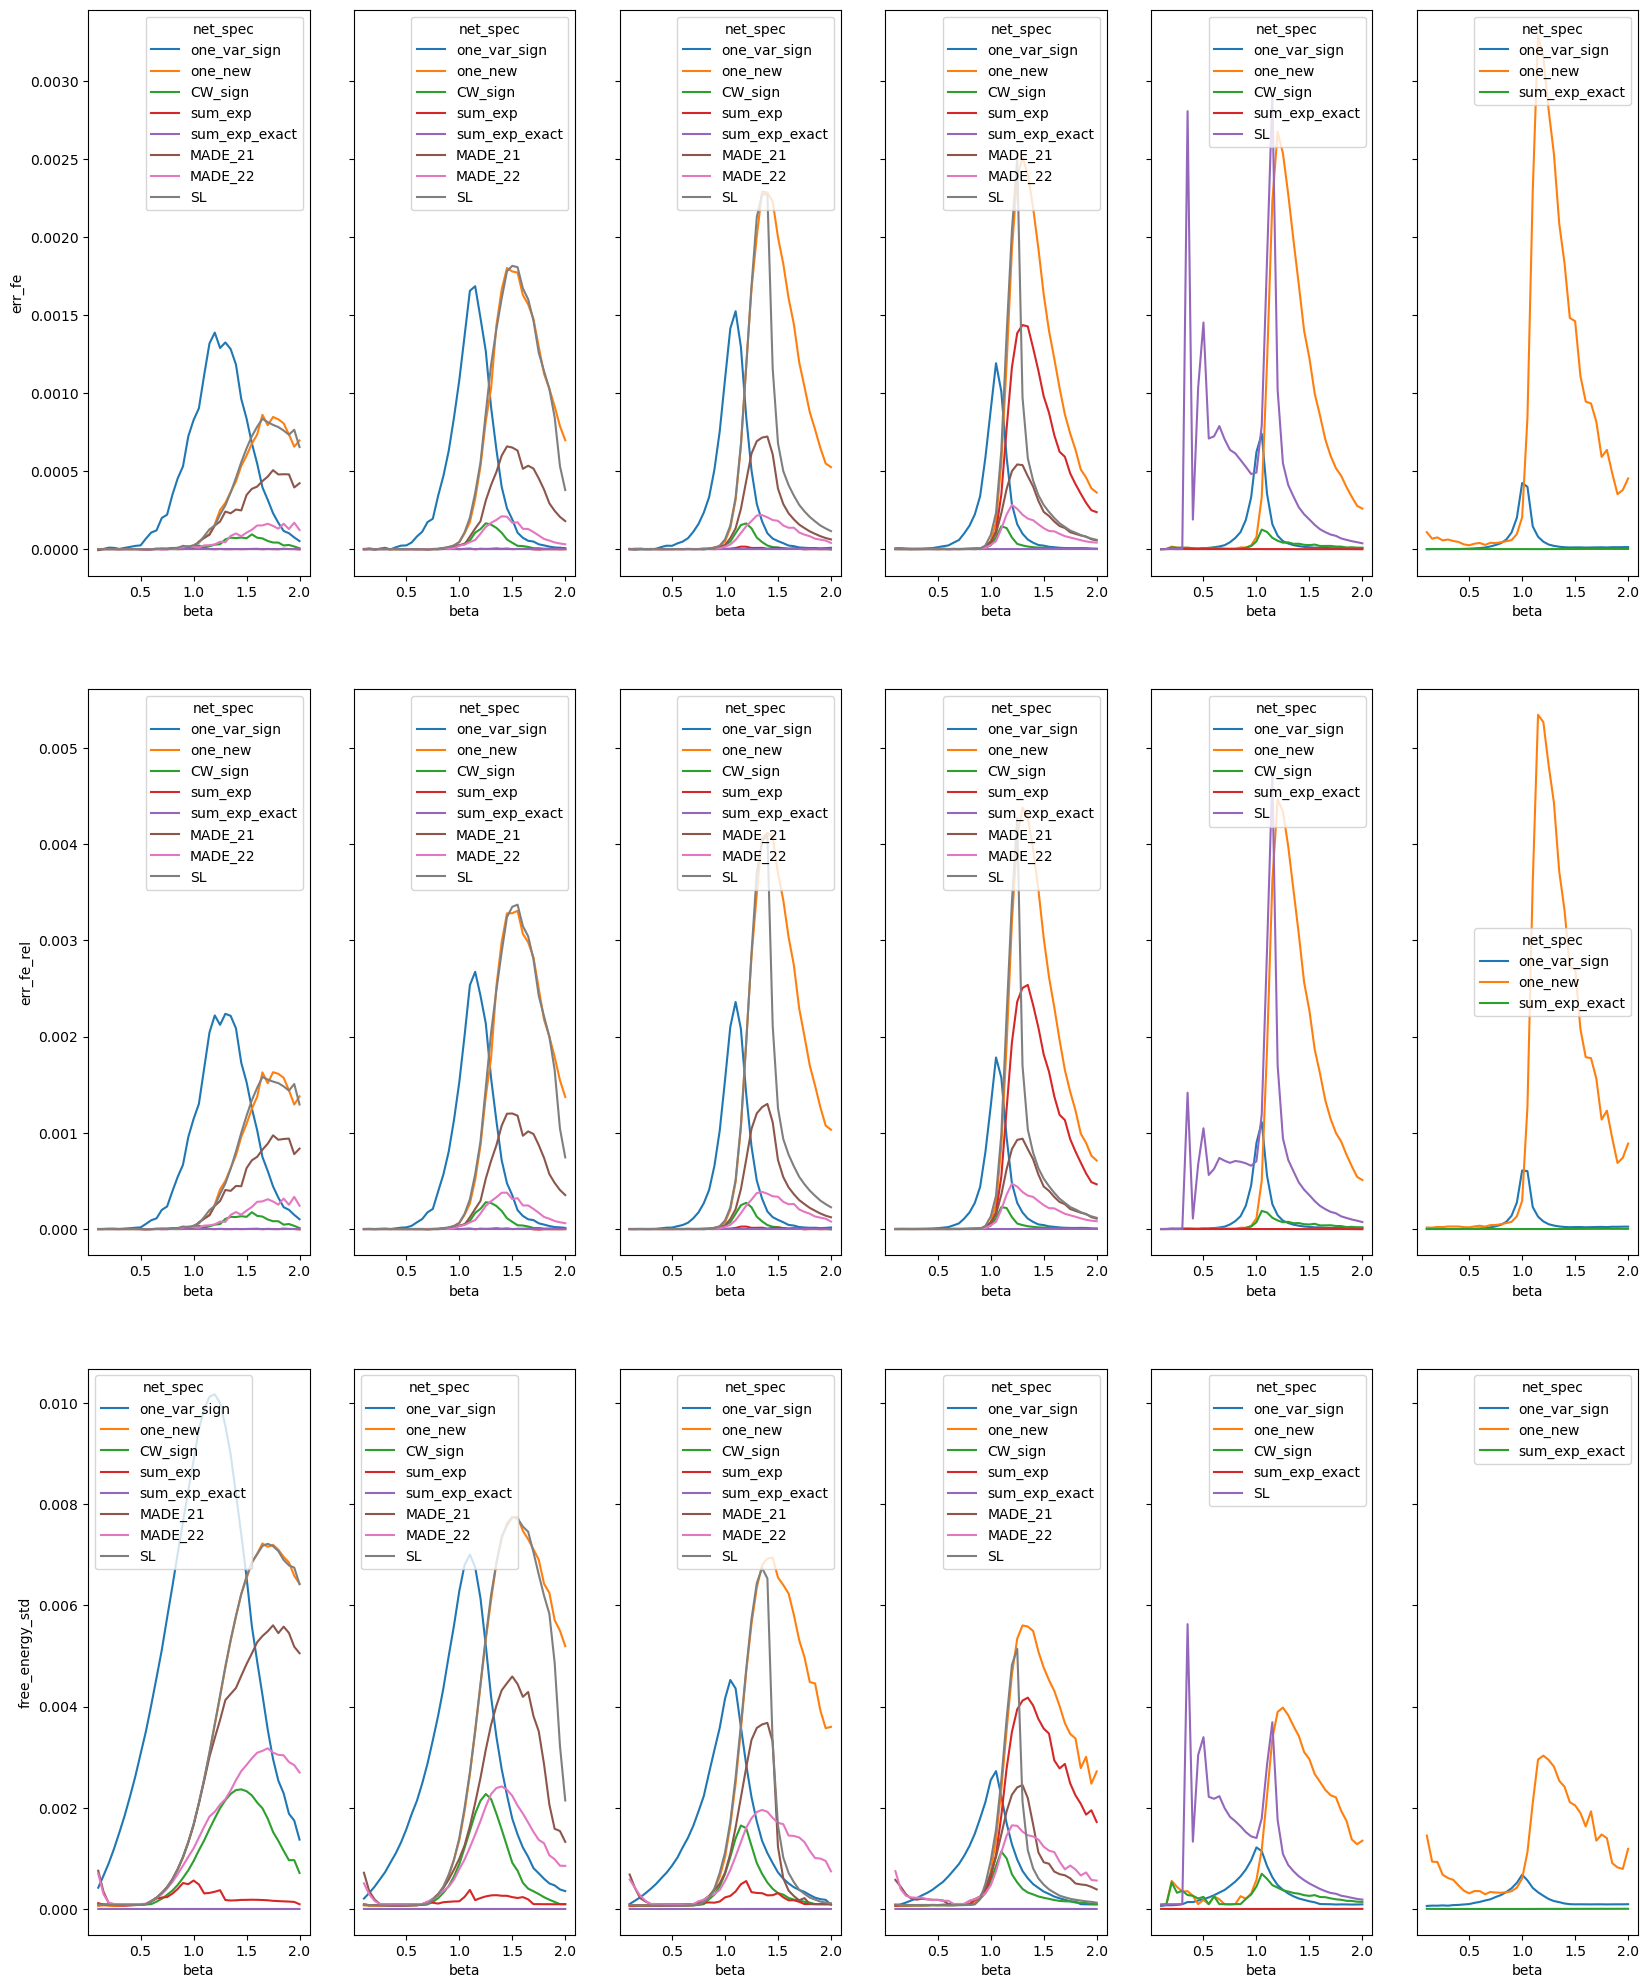

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

data_pl = {}
to_pl = ['one', 'one_new', "one_var_sign", 'CW_sign', 'sum_exp', 'sum_exp_exact', 'MADE_21', 'MADE_22', 'SL']
for N in Ns:
    data_pl[N] = data[N][data[N]['net_spec'].isin(to_pl)]    

fig, axs = plt.subplots(3,6, figsize=(20, 25), sharey="row")
# N=10
# #dd = data[N].rolling(5, on="beta").mean()
# sns.lineplot(data=data[N], x="beta", y="err_fe", hue="net_spec", ax=axs[0][0])
for i, N in enumerate(Ns): 
    sns.lineplot(data=data_pl[N], x="beta", y="err_fe", hue="net_spec", ax=axs[0][i])

# N=10
# sns.lineplot(data=data[N], x="beta", y="err_fe_rel", hue="net_spec", ax=axs[1][0])
for i, N in enumerate(Ns): 
    sns.lineplot(data=data_pl[N], x="beta", y="err_fe_rel", hue="net_spec", ax=axs[1][i])

for i, N in enumerate(Ns): 
    sns.lineplot(data=data_pl[N], x="beta", y="free_energy_std", hue="net_spec", ax=axs[2][i])


In [11]:
data_pl[20]["num_train_params"]

39      21.0
40      21.0
41      21.0
42      21.0
43      21.0
       ...  
346    420.0
347    420.0
348    420.0
349    420.0
350    420.0
Name: num_train_params, Length: 312, dtype: float64

In [12]:
all_N = pd.DataFrame()
all_N = pd.concat([data_pl[xx] for xx in data_pl])

In [13]:
axs[0]

array([<AxesSubplot:xlabel='beta', ylabel='err_fe'>,
       <AxesSubplot:xlabel='beta', ylabel='err_fe'>,
       <AxesSubplot:xlabel='beta', ylabel='err_fe'>,
       <AxesSubplot:xlabel='beta', ylabel='err_fe'>,
       <AxesSubplot:xlabel='beta', ylabel='err_fe'>,
       <AxesSubplot:xlabel='beta', ylabel='err_fe'>], dtype=object)

In [14]:
all_N.groupby(["N", "net_spec"]).mean().reset_index()

,N,net_spec,beta,free_energy,free_energy_std,mag_mean,free_energy_mean,entropy_mean,energy_mean,mag,num_params,num_train_params,err_fe,err_fe_rel
0,100,CW_sign,1.05,NaN,3.582322e-04,0.469152,-1.209657,0.491690,-0.172104,-0.000384,200.0,200.0,2.134824e-05,3.504725e-05
1,100,MADE_21,1.05,NaN,8.479894e-04,0.467655,-1.209522,0.491673,-0.171878,-0.003800,20300.0,20300.0,1.567563e-04,2.790114e-04
2,100,MADE_22,1.05,NaN,8.222150e-04,0.468621,-1.209615,0.491798,-0.171966,0.002419,40500.0,40500.0,6.357670e-05,1.144432e-04
3,100,SL,1.05,NaN,1.291328e-03,0.463752,-1.209290,0.492408,-0.170984,-0.000174,10100.0,10100.0,3.887687e-04,6.878361e-04
4,100,one_new,1.05,NaN,2.661320e-03,0.463830,-1.209030,0.490718,-0.171688,0.000879,100.0,100.0,6.491155e-04,1.182645e-03
5,100,one_var_sign,1.05,NaN,1.371360e-03,0.469750,-1.209427,0.491252,-0.172082,-0.000142,101.0,101.0,2.512640e-04,3.749769e-04
6,100,sum_exp,1.05,NaN,1.671894e-04,0.469444,-1.209676,0.491667,-0.172168,-0.000587,20594.0,20594.0,2.380248e-06,4.026827e-06
7,100,sum_exp_exact,1.05,NaN,2.680204e-07,0.469542,-1.209679,0.491648,-0.172190,-0.001277,20594.0,0.0,6.163483e-08,1.392086e-07
8,1000,one_new,1.05,NaN,1.217282e-03,0.428853,-1.206449,0.483733,-0.172695,-0.000222,1000.0,1000.0,7.596946e-04,1.307251e-03
9,1000,one_var_sign,1.05,NaN,1.801734e-04,0.434540,-1.207163,0.485298,-0.172917,-0.000590,1001.0,1001.0,4.567211e-05,6.760283e-05


<AxesSubplot:xlabel='N', ylabel='num_params'>

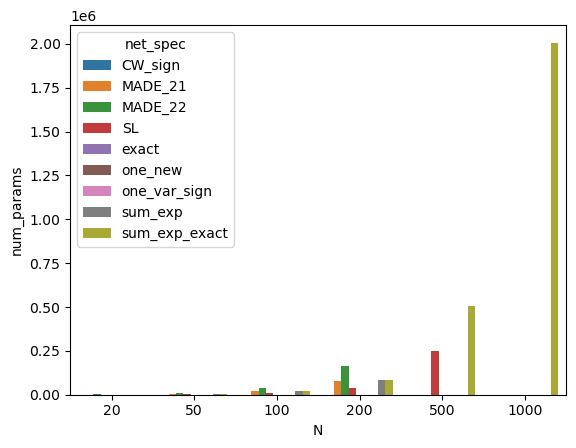

In [15]:
all_N = pd.DataFrame()
all_N = pd.concat([data[xx] for xx in data])
all_N["N"]=pd.to_numeric(all_N["N"])
aa = all_N.groupby(["N", "net_spec"]).mean().reset_index()
sns.barplot(data=aa, x="N", y="num_params", hue="net_spec")

In [16]:
aa

,N,net_spec,beta,free_energy,free_energy_std,mag_mean,free_energy_mean,entropy_mean,energy_mean,mag,num_params,num_train_params,err_fe,err_fe_rel
0,20,CW_sign,1.05,NaN,9.981008e-04,0.520697,-1.218269,0.517323,-0.167676,-0.000332,40.0,40.0,2.355890e-05,4.236301e-05
1,20,MADE_21,1.05,NaN,2.535062e-03,0.518164,-1.218130,0.517895,-0.167139,0.000766,860.0,860.0,1.628999e-04,3.029905e-04
2,20,MADE_22,1.05,NaN,1.504415e-03,0.520104,-1.218240,0.517360,-0.167631,-0.000916,1700.0,1700.0,5.247714e-05,9.752149e-05
3,20,SL,1.05,NaN,3.104391e-03,0.516938,-1.218020,0.517716,-0.167083,-0.000378,420.0,420.0,2.728131e-04,5.095496e-04
4,20,exact,1.05,-1.218293,0.000000e+00,0.520965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,20,one_new,1.05,NaN,3.095550e-03,0.517234,-1.218022,0.517673,-0.167171,-0.000190,20.0,20.0,2.701467e-04,5.052004e-04
6,20,one_var_sign,1.05,NaN,5.052599e-03,0.521440,-1.217832,0.516182,-0.167751,-0.000206,21.0,21.0,4.602313e-04,7.348320e-04
7,20,sum_exp,1.05,NaN,2.097050e-04,0.520781,-1.218292,0.517208,-0.167758,0.000292,914.0,914.0,6.065712e-07,8.534742e-07
8,20,sum_exp_exact,1.05,NaN,1.465361e-07,0.521113,-1.218293,0.517245,-0.167821,0.000476,914.0,0.0,-1.038281e-08,-5.106592e-08
9,50,CW_sign,1.05,NaN,6.041751e-04,0.487231,-1.212094,0.498623,-0.170996,-0.000172,100.0,100.0,2.834288e-05,4.804099e-05


In [17]:
all_ = all_N.groupby(["N", "net_spec"]).mean()
all_

beta  free_energy  free_energy_std  mag_mean  \
N    net_spec                                                      
20   CW_sign        1.05          NaN     9.981008e-04  0.520697   
     MADE_21        1.05          NaN     2.535062e-03  0.518164   
     MADE_22        1.05          NaN     1.504415e-03  0.520104   
     SL             1.05          NaN     3.104391e-03  0.516938   
     exact          1.05    -1.218293     0.000000e+00  0.520965   
     one_new        1.05          NaN     3.095550e-03  0.517234   
     one_var_sign   1.05          NaN     5.052599e-03  0.521440   
     sum_exp        1.05          NaN     2.097050e-04  0.520781   
     sum_exp_exact  1.05          NaN     1.465361e-07  0.521113   
50   CW_sign        1.05          NaN     6.041751e-04  0.487231   
     MADE_21        1.05          NaN     1.716448e-03  0.485575   
     MADE_22        1.05          NaN     9.561894e-04  0.486659   
     SL             1.05          NaN     3.010564e-03  0.481767   
     exact          1.05    -1.212122     0.000000e+00  0.487479   
     one_new        1.05          NaN     3.177964e-03  0.482206   
     one_var_sign   1.05          NaN     2.533761e-03  0.487951   
     sum_exp        1.05          NaN     1.462046e-04  0.487590   
     sum_exp_exact  1.05          NaN     1.830287e-07  0.487377   
100  CW_sign        1.05          NaN     3.582322e-04  0.469152   
     MADE_21        1.05          NaN     8.479894e-04  0.467655   
     MADE_22        1.05          NaN     8.222150e-04  0.468621   
     SL             1.05          NaN     1.291328e-03  0.463752   
     exact          1.05    -1.209679     0.000000e+00  0.469441   
     one_new        1.05          NaN     2.661320e-03  0.463830   
     one_var_sign   1.05          NaN     1.371360e-03  0.469750   
     sum_exp        1.05          NaN     1.671894e-04  0.469444   
     sum_exp_exact  1.05          NaN     2.680204e-07  0.469542   
200  CW_sign        1.05          NaN     2.395194e-04  0.455452   
     MADE_21        1.05          NaN     7.195547e-04  0.453903   
     MADE_22        1.05          NaN     6.774009e-04  0.454765   
     SL             1.05          NaN     7.207003e-04  0.450376   
     exact          1.05    -1.208350     0.000000e+00  0.455734   
     one_new        1.05          NaN     2.071144e-03  0.450424   
     one_var_sign   1.05          NaN     7.257483e-04  0.455850   
     sum_exp        1.05          NaN     1.532078e-03  0.452632   
     sum_exp_exact  1.05          NaN     4.371165e-07  0.455708   
500  CW_sign        1.05          NaN     2.587486e-04  0.442142   
     SL             1.05          NaN     1.268861e-03  0.438412   
     exact          1.05    -1.207503     0.000000e+00  0.442554   
     one_new        1.05          NaN     1.430838e-03  0.437410   
     one_var_sign   1.05          NaN     3.165320e-04  0.442276   
     sum_exp_exact  1.05          NaN     8.935430e-07  0.442608   
1000 exact          1.05    -1.207209     0.000000e+00  0.435395   
     one_new        1.05          NaN     1.217282e-03  0.428853   
     one_var_sign   1.05          NaN     1.801734e-04  0.434540   
     sum_exp_exact  1.05          NaN     1.632456e-06  0.435430   

                    free_energy_mean  entropy_mean  energy_mean       mag  \
N    net_spec                                                               
20   CW_sign               -1.218269      0.517323    -0.167676 -0.000332   
     MADE_21               -1.218130      0.517895    -0.167139  0.000766   
     MADE_22               -1.218240      0.517360    -0.167631 -0.000916   
     SL                    -1.218020      0.517716    -0.167083 -0.000378   
     exact                       NaN           NaN          NaN       NaN   
     one_new               -1.218022      0.517673    -0.167171 -0.000190   
     one_var_sign          -1.217832      0.516182    -0.167751 -0.000206   
     sum_exp               -1.218292      0.517208    -0.16775

In [18]:
all_N[all_N["N"]<210]

,beta,free_energy,free_energy_std,mag_mean,save_dir,file_name,model,net_spec,device,suffix,...,entropy_mean,energy_mean,mag,fe_run,fe_std_run,num_params,num_train_params,seed,err_fe,err_fe_rel
0,0.10,-6.932735,0.000000,0.185648,./results/Curie-Weiss/data/,data,CW,exact,cpu,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.15,-4.622940,0.000000,0.190910,./results/Curie-Weiss/data/,data,CW,exact,cpu,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.20,-3.468437,0.000000,0.196588,./results/Curie-Weiss/data/,data,CW,exact,cpu,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.25,-2.776087,0.000000,0.202735,./results/Curie-Weiss/data/,data,CW,exact,cpu,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.30,-2.314845,0.000000,0.209412,./results/Curie-Weiss/data/,data,CW,exact,cpu,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1.80,NaN,0.000183,0.931182,./results/Curie-Weiss/data/,data,CW,SL,cpu,None,...,0.152865,-0.431520,0.003641,NaN,NaN,40200.0,40200.0,NaN,0.000105,0.000203
347,1.85,NaN,0.000166,0.938763,./results/Curie-Weiss/data/,data,CW,SL,cpu,None,...,0.140060,-0.438542,0.008896,NaN,NaN,40200.0,40200.0,NaN,0.000090,0.000175
348,1.90,NaN,0.000152,0.945630,./results/Curie-Weiss/data/,data,CW,SL,cpu,None,...,0.128023,-0.444963,-0.002248,NaN,NaN,40200.0,40200.0,NaN,0.000078,0.000152
349,1.95,NaN,0.000140,0.951325,./results/Curie-Weiss/data/,data,CW,SL,cpu,None,...,0.117708,-0.450323,-0.001471,NaN,NaN,40200.0,40200.0,NaN,0.000067,0.000132


In [19]:
data_q=pd.DataFrame()
seeds=[0]
to_pl = ['one_new', "one_var_sign", 
 'sum_exp_exact', 'MADE_21', 'MADE_22', 'SL']
data_dir="data_net/"
files_q = glob.glob(data_dir+"*.gzip")

for seed in seeds:
    for N in Ns:
        for net_spec in to_pl:
            name_f = f"N{N}_seed{seed}_model{model}_net_spec{net_spec}"
            res = [i for i in files_q if name_f in i]
            if len(res) == 1:
                def repl(name_col):
                    return name_col.replace(net_spec, "")
                df_ = pd.read_pickle(res[0])
                df_ = df_.rename(repl, axis='columns')
                data_q = pd.concat([data_q, df_], ignore_index=True)
                print(f"read: {res[0]}")
            elif len(res) > 1:
                print(res)
                def repl(name_col):
                    return name_col.replace(net_spec, "")
                df_ = pd.read_pickle(res[0])
                df_ = df_.rename(repl, axis='columns')
                df_["N"]= int(N)
                data_q = pd.concat([data_q, df_], ignore_index=True)
                print(f"read: {res[0]}")
data_q = data_q.astype({'N': 'int32'})

read: data_net/N200_seed0_modelCW_net_specone_new_20230207_143357.gzip
read: data_net/N200_seed0_modelCW_net_specone_var_sign_20230207_165614.gzip
read: data_net/N200_seed0_modelCW_net_specsum_exp_exact_20230207_141930.gzip
read: data_net/N200_seed0_modelCW_net_specMADE_21_20230208_141607.gzip
read: data_net/N200_seed0_modelCW_net_specMADE_22_20230208_150308.gzip
read: data_net/N200_seed0_modelCW_net_specSL_20230207_181947.gzip


In [20]:
data_q

,beta,free_energy_mean,free_energy_std,entropy_mean,energy_mean,mag,mag_mean,q,fe_run,fe_std_run,...,h,lr,std_fe_limit,max_step,init_steps,batch_size,batch_iter,stats_step,num_threads,beta_range
0,0.10,-6.931605,0.000061,0.693132,-0.000284,-0.000098,0.059522,"[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[-6.931602478027344, -6.931603240966797, -6.93...","[8.859451045282186e-05, 8.344956440851093e-05,...",...,0.0,0.001,0.0001,1000,5000,2000,20,1,4,"[0.1, 2.0, 39.0]"
1,0.15,-4.621188,0.000069,0.693113,-0.000437,-0.000483,0.061080,"[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[-4.621185811360677, -4.6211395263671875, -4.6...","[0.0013152461498975754, 0.0010896543661753336,...",...,0.0,0.001,0.0001,1000,5000,2000,20,1,4,"[0.1, 2.0, 39.0]"
2,0.20,-3.466023,0.000073,0.693089,-0.000579,0.000711,0.062536,"[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[-3.4660030364990235, -3.466004180908203, -3.4...","[0.0010071001946926118, 0.0008791793137788772,...",...,0.0,0.001,0.0001,1000,5000,2000,20,1,4,"[0.1, 2.0, 39.0]"
3,0.25,-2.772963,0.000072,0.693033,-0.000832,-0.000133,0.065224,"[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[-2.772916259765625, -2.7729568481445312, -2.7...","[0.0008412124216556549, 0.0007223734259605408,...",...,0.0,0.001,0.0001,1000,5000,2000,20,1,4,"[0.1, 2.0, 39.0]"
4,0.30,-2.310959,0.000070,0.692970,-0.001061,0.000442,0.067407,"[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[-2.3109563191731772, -2.3109580993652346, -2....","[0.0007857343181967736, 0.0006177930782238643,...",...,0.0,0.001,0.0001,1000,5000,2000,20,1,4,"[0.1, 2.0, 39.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,1.80,-0.516447,0.000183,0.152428,-0.431765,-0.008412,0.931457,"[tensor(164.1000), tensor(3808.8999), tensor(2...","[-0.5163330925835503, -0.5163847605387369, -0....","[0.0008672947684923807, 0.0006066441122028563,...",...,0.0,0.001,0.0001,1000,5000,2000,20,1,4,"[0.1, 2.0, 39.0]"
230,1.85,-0.514248,0.000164,0.140025,-0.438559,0.003771,0.938777,"[tensor(569.5000), tensor(10383.), tensor(6047...","[-0.5141609810494088, -0.5142115824931377, -0....","[0.0008176325946240812, 0.0005222551726006173,...",...,0.0,0.001,0.0001,1000,5000,2000,20,1,4,"[0.1, 2.0, 39.0]"
231,1.90,-0.512343,0.000150,0.128211,-0.444864,0.002093,0.945529,"[tensor(1366.), tensor(21760.5000), tensor(108...","[-0.5122690301192434, -0.5123267324347245, -0....","[0.0007086513073820817, 0.0004588912192143892,...",...,0.0,0.001,0.0001,1000,5000,2000,20,1,4,"[0.1, 2.0, 39.0]"
232,1.95,-0.510686,0.000133,0.117315,-0.450524,0.003794,0.951543,"[tensor(3422.3999), tensor(43762.), tensor(179...","[-0.510611079289363, -0.510665267553085, -0.51...","[0.000645638352785355, 0.00042534906130570633,...",...,0.0,0.001,0.0001,1000,5000,2000,20,1,4,"[0.1, 2.0, 39.0]"


/var/folders/jy/gjfds_4d4xsfqkq02klzlj240000gn/T/ipykernel_78377/1604490311.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pl[N]['net_spec'] = data_pl[N]['net_spec'].replace(replacement)
/var/folders/jy/gjfds_4d4xsfqkq02klzlj240000gn/T/ipykernel_78377/1604490311.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_beta['net_spec'] = df_beta['net_spec'].replace(replacement)
/var/folders/jy/gjfds_4d4xsfqkq02klzlj240000gn/T/ipykernel_78377/1604490311.py:90: SettingWithCopyWarning: 
A value is try

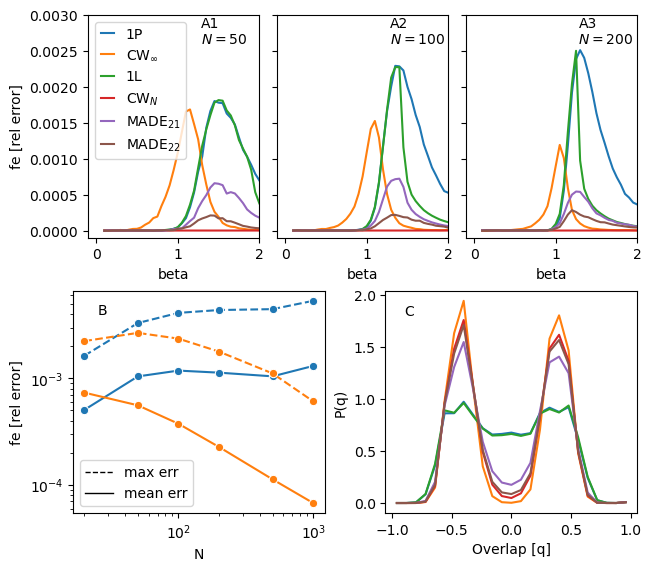

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import itertools


Ns=[20, 50, 100, 200, 500, 1000]
data_pl = {}
to_pl_old = ['one_new', 'one_var_sign', 'sum_exp_exact', 'MADE_21', 'MADE_22', 'SL']


for N in Ns:
    data_pl[N] = data[N][data[N]['net_spec'].isin(to_pl_old)]    

replacement = {'one_new': '1P', 'one_var_sign': 'CW$_{\infty}$', 'SL': '1L', 'sum_exp_exact': 'CW$_N$', 'MADE_21': 'MADE$_{21}$', 'MADE_22': 'MADE$_{22}$'}
for N in Ns:
    data_pl[N]['net_spec'] = data_pl[N]['net_spec'].replace(replacement)

to_plt = [replacement[key] for key in replacement]

# PLOT FIRST TREE FREE ENERGY ESTIMATES
all_N = pd.DataFrame()
all_N = pd.concat([data_pl[xx] for xx in data_pl])
all_N["N"]=pd.to_numeric(all_N["N"])

fig = plt.figure(constrained_layout=True, figsize=(6.4, 5.6))
gs = fig.add_gridspec(2, 1)

gs00 = gs[0].subgridspec(1, 3)
gs01 = gs[1].subgridspec(1, 2)

axs = [[], []]
axs[0].append(fig.add_subplot(gs00[0,0]))
axs[0].append(fig.add_subplot(gs00[0,1]))
axs[0].append(fig.add_subplot(gs00[0,2]))
axs[1].append(fig.add_subplot(gs01[0,0]))
axs[1].append(fig.add_subplot(gs01[0,1]))

# N=10
# #dd = data[N].rolling(5, on="beta").mean()
# sns.lineplot(data=data[N], x="beta", y="err_fe", hue="net_spec", ax=axs[0][0])
N1=Ns[1]
sns.lineplot(data=data_pl[N1], x="beta", y="err_fe", hue="net_spec", ax=axs[0][0], hue_order=to_plt)
N2=Ns[2]
sns.lineplot(data=data_pl[N2], x="beta", y="err_fe", hue="net_spec", ax=axs[0][1], hue_order=to_plt)
N3=Ns[3]
sns.lineplot(data=data_pl[N3], x="beta", y="err_fe", hue="net_spec", ax=axs[0][2], hue_order=to_plt)

# PLOT THE OVERLAPS

beta=1.2
N=200
df_beta = data_q[(np.abs(data_q["beta"] - beta) < 1e-6) & (data_q["N"] == N)]
df_beta['net_spec'] = df_beta['net_spec'].replace(replacement)

df_q = []
m=2000

for e in df_beta.iterrows():
    for ii, qq in enumerate(e[1]["q"]):
        df_q.append({"q":qq.numpy()/(m**2), "net_spec":e[1]["net_spec"], "x": 2*ii/len(e[1]["q"]) - 1})



df_q = pd.DataFrame(df_q)
n_bins = 25
# create the bins using the "cut" method
bins = np.linspace(-1, 1, n_bins + 1)
df_q["binned_x"] = pd.cut(df_q["x"], bins=bins)

# group the data by the values of "net_spec" and the bins of "x"
grouped = df_q.groupby(["net_spec", "binned_x"])

# calculate the mean of the "q" column for each group
binned_q = grouped["q"].agg(["mean", "std", "count"]).reset_index()
# get the standard color cycle
colors = itertools.cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])
binned_q["mids"] = [x.mid for x in binned_q["binned_x"]] 
binned_q["length"] = [x.length for x in binned_q["binned_x"]] 

# plot the histograms
to_plt = [replacement[key] for key in replacement]
for name in to_plt:
    #print(name)
    group = binned_q[binned_q["net_spec"] == name]
    color = next(colors)
    xx=group["length"].values
    yy=group["mean"].values
    norm =sum(xx*yy)
    #print(norm, xx)
    group["mean_density"] = group["mean"]/norm
    group.plot(x="mids", y="mean_density", kind="line", color=color, alpha=1, label=name, ax=axs[1][1], legend=False)
    y1= np.array(group["mean"]-group["std"]/np.sqrt(group["count"]).tolist())
    y2 = np.array(group["mean"]+group["std"]/np.sqrt(group["count"]).tolist())



data_pl = {}
to_pl = ['one_new', 'one_var_sign']

for N in Ns:
    data_pl[N] = data[N][data[N]['net_spec'].isin(to_pl)]    

for N in Ns:
    data_pl[N]['net_spec'] = data_pl[N]['net_spec'].replace(replacement)

to_plt = [replacement[key] for key in replacement]

all_N = pd.DataFrame()
all_N = pd.concat([data_pl[xx] for xx in data_pl])
all_N["N"]=pd.to_numeric(all_N["N"])

#_all_ = all_N.groupby(["N", "net_spec"]).reset_index()
pl_mean = sns.lineplot(data=all_N, x="N", y="err_fe_rel", hue="net_spec", ax=axs[1][0], estimator=np.mean, errorbar=None, marker="o", hue_order=to_plt)

pl_max = sns.lineplot(data=all_N, x="N", y="err_fe_rel", hue="net_spec", ax=axs[1][0], estimator=np.max, errorbar=None, marker="o", linestyle='--', hue_order=to_plt)


axs[0][0].set_ylim(-0.0001, 0.003)
axs[0][1].set_ylim(-0.0001, 0.003)
axs[0][2].set_ylim(-0.0001, 0.003)
axs[0][0].set_xlim(-0.1, 2.)
axs[0][1].set_xlim(-0.1, 2.)
axs[0][2].set_xlim(-0.1, 2.)
# axs[0][0].set_title(f"N: {N1}")
# axs[0][1].set_title(f"N: {N2}")
# axs[0][2].set_title(f"N: {N3}")
axs[0][1].set_yticklabels([])
axs[0][2].set_yticklabels([])
axs[0][2].set_ylabel("")
axs[0][1].set_ylabel("")
axs[0][0].set_ylabel("fe [rel error]")
axs[1][0].set_ylabel("fe [rel error]")

axs[1][1].set_xlabel("Overlap [q]")
axs[1][1].set_ylabel("P(q)")

#axs[1][0].set_yscale("log")
#axs[1][0].set_xscale("log")
axs[1][0].set_yscale("log")
axs[1][0].set_xscale("log")

axs[0][2].get_legend().remove()
axs[0][1].get_legend().remove()
#axs[1][0].legend("")
axs[0][0].legend(handlelength=1,)

axs[0][0].text(1.28, 0.0026, "A1\n$N=50$")
axs[0][1].text(1.28, 0.0026, "A2\n$N=100$")
axs[0][2].text(1.28, 0.0026, "A3\n$N=200$")
# axs[0][0].text(1.2, 0.003, r"$N=50$")
# axs[0][1].text(1.2, 0.003, r"$N=100$")
# axs[0][2].text(1.2, 0.003, r"$N=200$")
axs[1][0].text(25, 4e-3, "B")
axs[1][1].text(-0.9, 1.8, "C")


from matplotlib.lines import Line2D

custom_lines = [Line2D([0], [0], ls = "--", color="black", lw=1),
               Line2D([0], [0], ls = "-", color="black", lw=1),]
axs[1][0].legend(custom_lines, ['max err', 'mean err'])

#plt.tight_layout()
plt.savefig("../tex/img/CW_res.pdf", bbox_inches='tight')

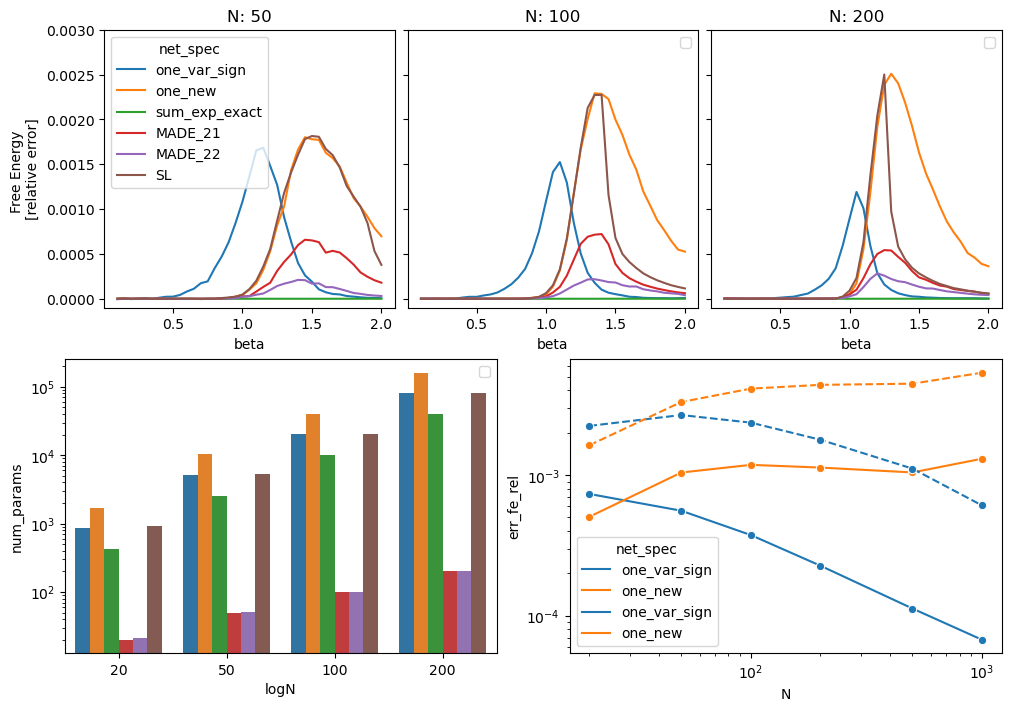

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt
Ns=[20, 50, 100, 200, 500, 1000]
data_pl = {}
to_pl = ['one_new', 'one_var_sign', 'sum_exp_exact', 'MADE_21', 'MADE_22', 'SL']
for N in Ns:
    data_pl[N] = data[N][data[N]['net_spec'].isin(to_pl)]    

all_N = pd.DataFrame()
all_N = pd.concat([data_pl[xx] for xx in data_pl])
all_N["N"]=pd.to_numeric(all_N["N"])

fig = plt.figure(constrained_layout=True, figsize=(10, 7))
gs = fig.add_gridspec(2, 1)

gs00 = gs[0].subgridspec(1, 3)
gs01 = gs[1].subgridspec(1, 2)

axs = [[], []]
axs[0].append(fig.add_subplot(gs00[0,0]))
axs[0].append(fig.add_subplot(gs00[0,1]))
axs[0].append(fig.add_subplot(gs00[0,2]))
axs[1].append(fig.add_subplot(gs01[0,0]))
axs[1].append(fig.add_subplot(gs01[0,1]))

# N=10
# #dd = data[N].rolling(5, on="beta").mean()
# sns.lineplot(data=data[N], x="beta", y="err_fe", hue="net_spec", ax=axs[0][0])
N1=Ns[1]
sns.lineplot(data=data_pl[N1], x="beta", y="err_fe", hue="net_spec", ax=axs[0][0])
N2=Ns[2]
sns.lineplot(data=data_pl[N2], x="beta", y="err_fe", hue="net_spec", ax=axs[0][1])
N3=Ns[3]
sns.lineplot(data=data_pl[N3], x="beta", y="err_fe", hue="net_spec", ax=axs[0][2])
axs[0][0].set_ylim(-0.0001, 0.003)
axs[0][1].set_ylim(-0.0001, 0.003)
axs[0][2].set_ylim(-0.0001, 0.003)
axs[0][0].set_title(f"N: {N1}")
axs[0][1].set_title(f"N: {N2}")
axs[0][2].set_title(f"N: {N3}")
axs[0][1].set_yticklabels([])
axs[0][2].set_yticklabels([])
axs[0][2].set_ylabel("")
axs[0][1].set_ylabel("")
axs[0][0].set_ylabel("Free Energy \n[relative error]")
axs[1][0].set_ylabel("Num of params")

aa = all_N[all_N["N"]<210].groupby(["N", "net_spec"]).mean().reset_index()
aa["logN"] = np.log(aa["N"])
sns.barplot(data=aa, x="logN", y="num_params", hue="net_spec", ax=axs[1][0])
axs[1][0].set_xticklabels(list(data_pl.keys())[:4])

axs[0][2].legend("")
axs[0][1].legend("")
axs[1][0].legend("")
data_pl = {}
to_pl = ['one_new', 'one_var_sign']

for N in Ns:
    data_pl[N] = data[N][data[N]['net_spec'].isin(to_pl)]    

all_N = pd.DataFrame()
all_N = pd.concat([data_pl[xx] for xx in data_pl])
all_N["N"]=pd.to_numeric(all_N["N"])

#_all_ = all_N.groupby(["N", "net_spec"]).reset_index()
sns.lineplot(data=all_N, x="N", y="err_fe_rel", hue="net_spec", ax=axs[1][1], estimator=np.mean, errorbar=None, marker="o")

sns.lineplot(data=all_N, x="N", y="err_fe_rel", hue="net_spec", ax=axs[1][1], estimator=np.max, errorbar=None, marker="o", linestyle='--')

axs[1][0].set_yscale("log")
#axs[1][0].set_xscale("log")
axs[1][1].set_yscale("log")
axs[1][1].set_xscale("log")
#plt.tight_layout()
#plt.savefig("../tex/img/CW_res.pdf", bbox_inches='tight')

In [39]:
model

'CW'

In [40]:
net_spec

'SL'

In [87]:
data_q=pd.DataFrame()
seeds=[0]
to_pl = ['one_new', "one_var_sign", 
 'sum_exp_exact', 'MADE_21', 'MADE_22', 'SL']
data_dir="data_net/"
files_q = glob.glob(data_dir+"*.gzip")

for seed in seeds:
    for N in Ns:
        for net_spec in to_pl:
            name_f = f"N{N}_seed{seed}_model{model}_net_spec{net_spec}"
            res = [i for i in files_q if name_f in i]
            if len(res) == 1:
                def repl(name_col):
                    return name_col.replace(net_spec, "")
                df_ = pd.read_pickle(res[0])
                df_ = df_.rename(repl, axis='columns')
                data_q = pd.concat([data_q, df_], ignore_index=True)
                print(f"read: {res[0]}")
            elif len(res) > 1:
                print(res)
                def repl(name_col):
                    return name_col.replace(net_spec, "")
                df_ = pd.read_pickle(res[0])
                df_ = df_.rename(repl, axis='columns')
                df_["N"]= int(N)
                data_q = pd.concat([data_q, df_], ignore_index=True)
                print(f"read: {res[0]}")

read: data_net/N200_seed0_modelCW_net_specone_new_20230207_143357.gzip
read: data_net/N200_seed0_modelCW_net_specone_var_sign_20230207_165614.gzip
read: data_net/N200_seed0_modelCW_net_specsum_exp_exact_20230207_141930.gzip
read: data_net/N200_seed0_modelCW_net_specMADE_21_20230208_141607.gzip
read: data_net/N200_seed0_modelCW_net_specMADE_22_20230208_150308.gzip
read: data_net/N200_seed0_modelCW_net_specSL_20230207_181947.gzip


In [88]:
data_q["beta"]

0      0.10
1      0.15
2      0.20
3      0.25
4      0.30
       ... 
229    1.80
230    1.85
231    1.90
232    1.95
233    2.00
Name: beta, Length: 234, dtype: float64

In [89]:
data_q = data_q.astype({'N': 'int32'})

In [90]:
data_q[(np.abs(data_q["beta"] - beta) < 1e-6)]["N"]

22     200
61     200
100    200
139    200
178    200
217    200
Name: N, dtype: int32

In [91]:
N=200
data_q[(data_q["N"] == N)]


,beta,free_energy_mean,free_energy_std,entropy_mean,energy_mean,mag,mag_mean,q,fe_run,fe_std_run,...,h,lr,std_fe_limit,max_step,init_steps,batch_size,batch_iter,stats_step,num_threads,beta_range
0,0.10,-6.931605,0.000061,0.693132,-0.000284,-0.000098,0.059522,"[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[-6.931602478027344, -6.931603240966797, -6.93...","[8.859451045282186e-05, 8.344956440851093e-05,...",...,0.0,0.001,0.0001,1000,5000,2000,20,1,4,"[0.1, 2.0, 39.0]"
1,0.15,-4.621188,0.000069,0.693113,-0.000437,-0.000483,0.061080,"[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[-4.621185811360677, -4.6211395263671875, -4.6...","[0.0013152461498975754, 0.0010896543661753336,...",...,0.0,0.001,0.0001,1000,5000,2000,20,1,4,"[0.1, 2.0, 39.0]"
2,0.20,-3.466023,0.000073,0.693089,-0.000579,0.000711,0.062536,"[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[-3.4660030364990235, -3.466004180908203, -3.4...","[0.0010071001946926118, 0.0008791793137788772,...",...,0.0,0.001,0.0001,1000,5000,2000,20,1,4,"[0.1, 2.0, 39.0]"
3,0.25,-2.772963,0.000072,0.693033,-0.000832,-0.000133,0.065224,"[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[-2.772916259765625, -2.7729568481445312, -2.7...","[0.0008412124216556549, 0.0007223734259605408,...",...,0.0,0.001,0.0001,1000,5000,2000,20,1,4,"[0.1, 2.0, 39.0]"
4,0.30,-2.310959,0.000070,0.692970,-0.001061,0.000442,0.067407,"[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[-2.3109563191731772, -2.3109580993652346, -2....","[0.0007857343181967736, 0.0006177930782238643,...",...,0.0,0.001,0.0001,1000,5000,2000,20,1,4,"[0.1, 2.0, 39.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,1.80,-0.516447,0.000183,0.152428,-0.431765,-0.008412,0.931457,"[tensor(164.1000), tensor(3808.8999), tensor(2...","[-0.5163330925835503, -0.5163847605387369, -0....","[0.0008672947684923807, 0.0006066441122028563,...",...,0.0,0.001,0.0001,1000,5000,2000,20,1,4,"[0.1, 2.0, 39.0]"
230,1.85,-0.514248,0.000164,0.140025,-0.438559,0.003771,0.938777,"[tensor(569.5000), tensor(10383.), tensor(6047...","[-0.5141609810494088, -0.5142115824931377, -0....","[0.0008176325946240812, 0.0005222551726006173,...",...,0.0,0.001,0.0001,1000,5000,2000,20,1,4,"[0.1, 2.0, 39.0]"
231,1.90,-0.512343,0.000150,0.128211,-0.444864,0.002093,0.945529,"[tensor(1366.), tensor(21760.5000), tensor(108...","[-0.5122690301192434, -0.5123267324347245, -0....","[0.0007086513073820817, 0.0004588912192143892,...",...,0.0,0.001,0.0001,1000,5000,2000,20,1,4,"[0.1, 2.0, 39.0]"
232,1.95,-0.510686,0.000133,0.117315,-0.450524,0.003794,0.951543,"[tensor(3422.3999), tensor(43762.), tensor(179...","[-0.510611079289363, -0.510665267553085, -0.51...","[0.000645638352785355, 0.00042534906130570633,...",...,0.0,0.001,0.0001,1000,5000,2000,20,1,4,"[0.1, 2.0, 39.0]"


In [92]:
data_q[(np.abs(data_q["beta"] - beta)) < 1e-6]

,beta,free_energy_mean,free_energy_std,entropy_mean,energy_mean,mag,mag_mean,q,fe_run,fe_std_run,...,h,lr,std_fe_limit,max_step,init_steps,batch_size,batch_iter,stats_step,num_threads,beta_range
22,1.2,-0.598740,4.638432e-03,0.496475,-0.185011,0.006515,0.575039,"[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[-0.5979432423909505, -0.5980353037516276, -0....","[0.005819478631019592, 0.0056610609094301855, ...",...,0.0,0.001,0.0001,1000,5000,2000,20,1,4,"[0.1, 2.0, 39.0]"
61,1.2,-0.600372,1.279372e-03,0.472922,-0.206270,-0.001254,0.639391,"[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[-0.5993375778198242, -0.5998183568318685, -0....","[0.0028884770969549813, 0.0025233755509058635,...",...,0.0,0.001,0.0001,1000,5000,2000,20,1,4,"[0.1, 2.0, 39.0]"
100,1.2,-0.600658,2.862492e-07,0.478736,-0.201711,0.004688,0.628667,"[tensor(0.), tensor(0.), tensor(0.), tensor(0....",NaN,NaN,...,0.0,0.001,0.0001,1000,5000,2000,20,1,4,"[0.1, 2.0, 39.0]"
139,1.2,-0.600025,2.585092e-03,0.483979,-0.196709,-0.008108,0.614819,"[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[-0.5989002227783203, -0.5992706298828125, -0....","[0.004413796464602152, 0.0040125245849291485, ...",...,0.0,0.001,0.0001,1000,5000,2000,20,1,4,"[0.1, 2.0, 39.0]"
178,1.2,-0.600491,1.251151e-03,0.479863,-0.200606,0.002416,0.625373,"[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[-0.5992787679036459, -0.5999563217163086, -0....","[0.003502682348092397, 0.002753985424836477, 0...",...,0.0,0.001,0.0001,1000,5000,2000,20,1,4,"[0.1, 2.0, 39.0]"
217,1.2,-0.598590,4.801704e-03,0.494564,-0.186453,0.001028,0.577648,"[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[-0.5975593566894531, -0.5978742599487304, -0....","[0.005982479949792226, 0.005898441871007284, 0...",...,0.0,0.001,0.0001,1000,5000,2000,20,1,4,"[0.1, 2.0, 39.0]"


In [93]:
beta=1.5
N=200
df_beta = data_q[(np.abs(data_q["beta"] - beta) < 1e-6) & (data_q["N"] == N)]

df_beta

,beta,free_energy_mean,free_energy_std,entropy_mean,energy_mean,mag,mag_mean,q,fe_run,fe_std_run,...,h,lr,std_fe_limit,max_step,init_steps,batch_size,batch_iter,stats_step,num_threads,beta_range
28,1.5,-0.537929,4.771803e-03,0.254369,-0.368350,0.005540,0.857566,"[tensor(0.1000), tensor(6.7000), tensor(122.50...","[-0.5374899291992188, -0.53764404296875, -0.53...","[0.006892467339833577, 0.006098153988520304, 0...",...,0.0,0.001,0.0001,1000,5000,2000,20,1,4,"[0.1, 2.0, 39.0]"
67,1.5,-0.539538,3.436600e-04,0.264902,-0.362937,-0.002397,0.853509,"[tensor(0.), tensor(0.4000), tensor(6.2000), t...","[-0.5392753601074218, -0.5393572489420573, -0....","[0.0014758440852165222, 0.0010059056679407755,...",...,0.0,0.001,0.0001,1000,5000,2000,20,1,4,"[0.1, 2.0, 39.0]"
106,1.5,-0.539560,4.917511e-07,0.264491,-0.363233,-0.000940,0.853881,"[tensor(0.), tensor(0.5000), tensor(6.2000), t...",NaN,NaN,...,0.0,0.001,0.0001,1000,5000,2000,20,1,4,"[0.1, 2.0, 39.0]"
145,1.5,-0.539196,1.397866e-03,0.263079,-0.363811,0.010664,0.854493,"[tensor(0.), tensor(0.2000), tensor(8.), tenso...","[-0.5388179016113281, -0.5390646362304687, -0....","[0.0022074981530507405, 0.0017866188287734986,...",...,0.0,0.001,0.0001,1000,5000,2000,20,1,4,"[0.1, 2.0, 39.0]"
184,1.5,-0.539531,3.849260e-04,0.263864,-0.363622,0.002498,0.854368,"[tensor(0.), tensor(0.3000), tensor(7.8000), t...","[-0.5391855875651042, -0.5394419352213542, -0....","[0.001673825184504191, 0.0011282924811045329, ...",...,0.0,0.001,0.0001,1000,5000,2000,20,1,4,"[0.1, 2.0, 39.0]"
223,1.5,-0.539270,4.857511e-04,0.263406,-0.363666,0.005933,0.854170,"[tensor(0.), tensor(0.9000), tensor(13.), tens...","[-0.5389465840657552, -0.539081776936849, -0.5...","[0.0017908942699432374, 0.001494222382704417, ...",...,0.0,0.001,0.0001,1000,5000,2000,20,1,4,"[0.1, 2.0, 39.0]"


In [101]:
df_q

,q,net_spec,x,binned_x
0,0.0000,one_new,-1.00,NaN
1,0.0000,one_new,-0.98,"(-1.0, -0.905]"
2,0.0000,one_new,-0.96,"(-1.0, -0.905]"
3,0.0000,one_new,-0.94,"(-1.0, -0.905]"
4,0.0000,one_new,-0.92,"(-1.0, -0.905]"
...,...,...,...,...
595,0.0000,SL,0.90,"(0.81, 0.905]"
596,0.0000,SL,0.92,"(0.905, 1.0]"
597,0.0000,SL,0.94,"(0.905, 1.0]"
598,0.0000,SL,0.96,"(0.905, 1.0]"


In [ ]:
df_q.hist(x="q", y="err_fe", hue="net_spec")

<AxesSubplot:xlabel='x', ylabel='q'>

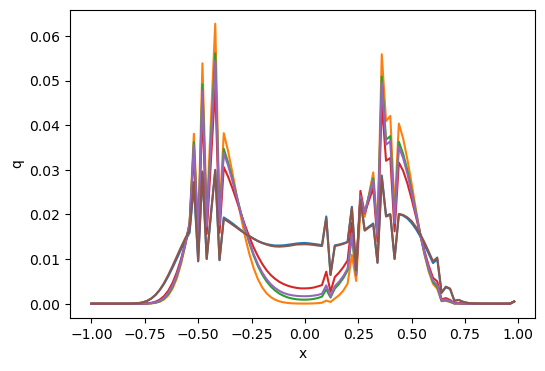

In [106]:
fig, axs = plt.subplots(1, 1, figsize=(6, 4))
beta=1.2
N=200
df_beta = data_q[(np.abs(data_q["beta"] - beta) < 1e-6) & (data_q["N"] == N)]
df_q = []
m=2000
for e in df_beta.iterrows():
    for ii, qq in enumerate(e[1]["q"]):
        df_q.append({"q":qq.numpy()/(m**2), "net_spec":e[1]["net_spec"], "x": 2*ii/len(e[1]["q"]) - 1})
        
df_q = pd.DataFrame(df_q)
sns.lineplot(data=df_q, x="x", y="q", hue="net_spec", ax=axs, legend=False)

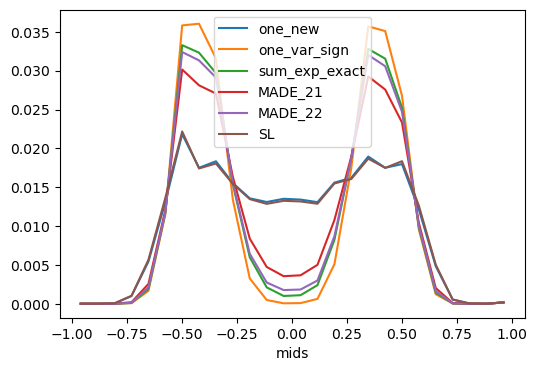

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 1, figsize=(6, 4))
beta=1.2
N=200
df_beta = data_q[(np.abs(data_q["beta"] - beta) < 1e-6) & (data_q["N"] == N)]
df_q = []
m=2000
for e in df_beta.iterrows():
    for ii, qq in enumerate(e[1]["q"]):
        df_q.append({"q":qq.numpy()/(m**2), "net_spec":e[1]["net_spec"], "x": 2*ii/len(e[1]["q"]) - 1})
        
df_q = pd.DataFrame(df_q)
n_bins = 26
# create the bins using the "cut" method
bins = np.linspace(-1, 1, n_bins + 1)
df_q["binned_x"] = pd.cut(df_q["x"], bins=bins)

# group the data by the values of "net_spec" and the bins of "x"
grouped = df_q.groupby(["net_spec", "binned_x"])

# calculate the mean of the "q" column for each group
binned_q = grouped["q"].agg(["mean", "std", "count"]).reset_index()
# get the standard color cycle
colors = itertools.cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])
binned_q["mids"] = [x.mid for x in binned_q["binned_x"]] 
# plot the histograms
for name in to_pl:
    group = binned_q[binned_q["net_spec"] == name]
    color = next(colors)
    group.plot(x="mids", y="mean", kind="line", color=color, alpha=1, label=name, ax=axs, legend=True)
    y1= np.array(group["mean"]-group["std"]/np.sqrt(group["count"]).tolist())
    y2 = np.array(group["mean"]+group["std"]/np.sqrt(group["count"]).tolist())
    #axs.fill_between(group["mids"], y1, y2, color=color, alpha=0.2)


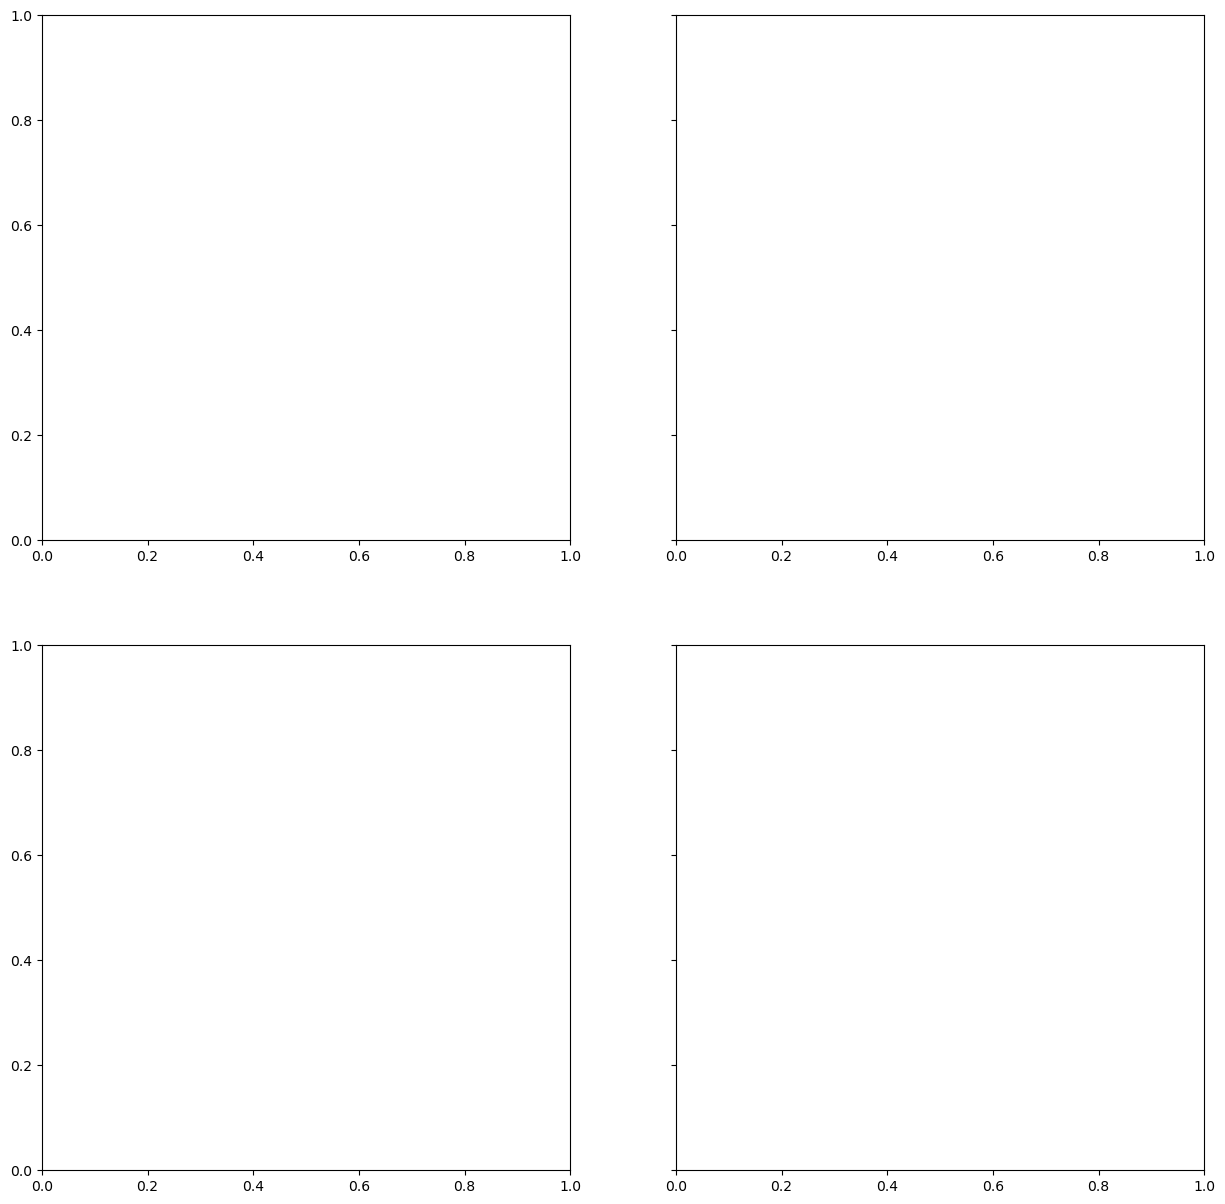

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'same') / w

Ns=[100, 200]
fig, axs = plt.subplots(len(Ns),2, figsize=(15, 15), sharey="row")
beta=1.5
df_beta = data[N]
m=2000
rr_avg = 5
for i, N in enumerate(Ns):
    for ii, nn in enumerate(net_specs):
        beta=2
        d_ = df_beta[(df_beta["net_spec"] == nn) & (df_beta["N"] == N)]
        #print(torch.tensor(d_["q"]))
        if len(d_) > 0:
            #print(d_["q"].iloc[0], d_["q"].iloc[1])
            axs[i][1].plot([0,1], [0,0], linestyle="dashed", color="black")
            res = torch.stack([d_["q"].iloc[i] for i in range(len(d_["q"]))], dim=1)/(m**2)
            avgs = moving_average(res.mean(dim=1),rr_avg)
            stds = moving_average(res.std(dim=1),rr_avg)/np.sqrt(10)
            avgs = (np.flip(avgs[:int(len(avgs)/2)], 0) + avgs[int(len(avgs)/2):]) / 2
            stds = (np.flip(stds[:int(len(stds)/2)],0) + stds[int(len(stds)/2):]) / 2
            
            #sns.lineplot(data=d_, x="beta", y="err_fe", hue="net_spec", ax=axs[i][ii], legend="full")
            #print(res.mean(dim=1).shape, avgs.shape)
            #print(res.shape, d_.seed)
            axs[i][0].errorbar(x = np.linspace(0,1, 50), y=avgs, label=f"q {nn} {N}, num:{res.shape[1]}")
            #axs[i][ii].hist(np.linspace(-1,1, 100), weights=res, bins=100, label=f"q {nn} {N}")
            axs[i][0].legend()
            #axs[i][0].set_ylim(-0., 0.005)

<AxesSubplot:xlabel='beta', ylabel='err_fe_rel'>

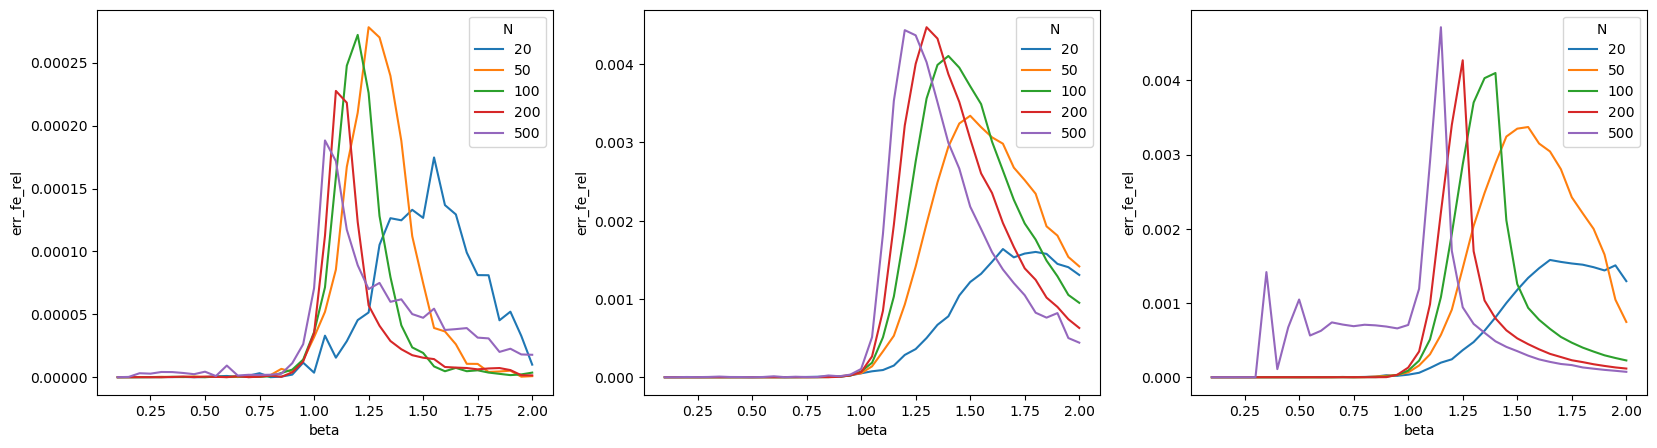

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

data_pl = {}
to_pl = ['one', 'CW_sign', 'SL']
for N in Ns:
    data_pl[N] = data[N][data[N]['net_spec'].isin(to_pl)]    

all_N = pd.DataFrame()
all_N = pd.concat([data_pl[xx] for xx in data_pl])
#fig, axs = plt.subplots(1,3, figsize=(20, 5), sharey=True)
fig, axs = plt.subplots(1,3, figsize=(20, 5))

sns.lineplot(data=all_N[all_N["net_spec"] == 'CW_sign'], x="beta", y="err_fe_rel", hue="N", ax=axs[0])
sns.lineplot(data=all_N[all_N["net_spec"] == 'one'], x="beta", y="err_fe_rel", hue="N", ax=axs[1])
sns.lineplot(data=all_N[all_N["net_spec"] == 'SL'], x="beta", y="err_fe_rel", hue="N", ax=axs[2])


<AxesSubplot:xlabel='beta', ylabel='err_fe_rel'>

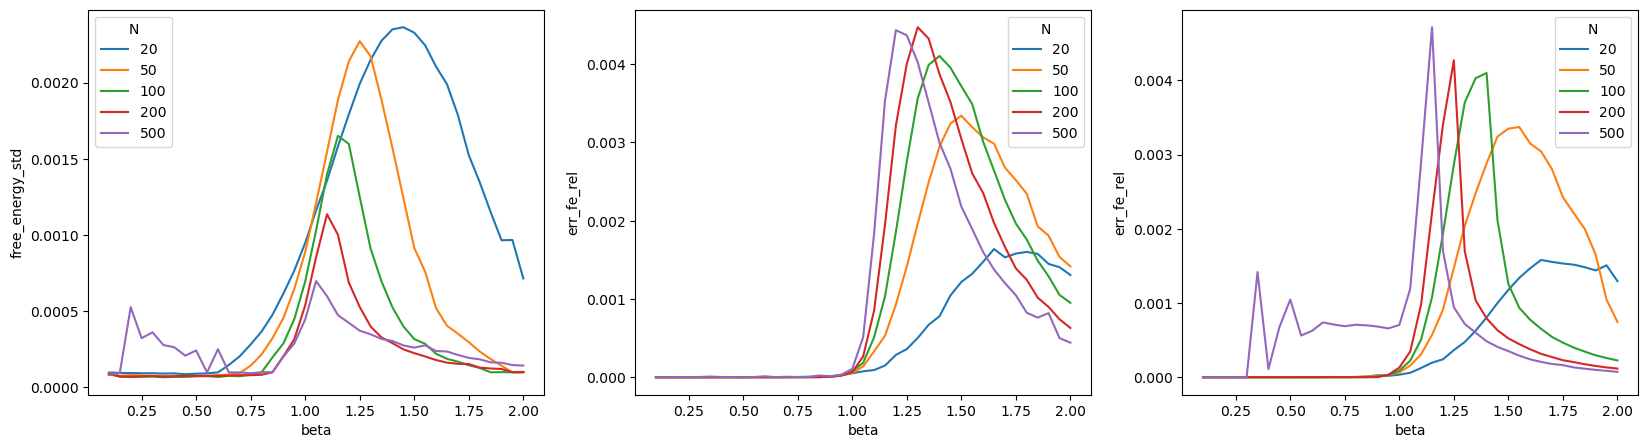

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

data_pl = {}
to_pl = ['one', 'CW_sign', 'SL']
for N in Ns:
    data_pl[N] = data[N][data[N]['net_spec'].isin(to_pl)]    

all_N = pd.DataFrame()
all_N = pd.concat([data_pl[xx] for xx in data_pl])
#fig, axs = plt.subplots(1,3, figsize=(20, 5), sharey=True)
fig, axs = plt.subplots(1,3, figsize=(20, 5))

sns.lineplot(data=all_N[all_N["net_spec"] == 'CW_sign'], x="beta", y="free_energy_std", hue="N", ax=axs[0])
sns.lineplot(data=all_N[all_N["net_spec"] == 'one'], x="beta", y="err_fe_rel", hue="N", ax=axs[1])
sns.lineplot(data=all_N[all_N["net_spec"] == 'SL'], x="beta", y="err_fe_rel", hue="N", ax=axs[2])


In [ ]:
import seaborn as sns
N=20
sns.lineplot(data=data[N], x="beta", y="err_fe_rel", hue="net_spec")

ValueError: Could not interpret value `err_fe_rel` for parameter `y`

<AxesSubplot:xlabel='beta', ylabel='err_fe_rel'>

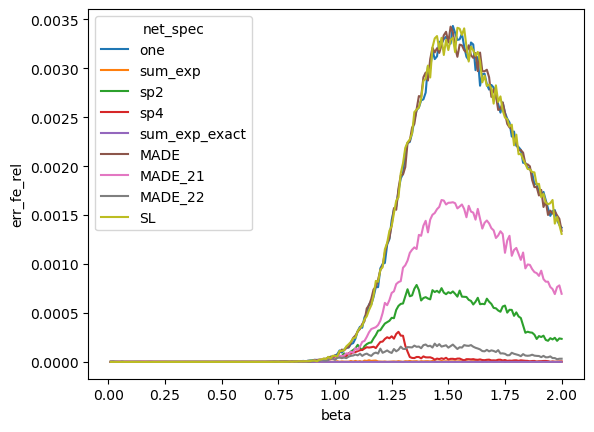

In [56]:
import seaborn as sns
N=50
sns.lineplot(data=data[N], x="beta", y="err_fe_rel", hue="net_spec")

<AxesSubplot:xlabel='beta', ylabel='err_fe_rel'>

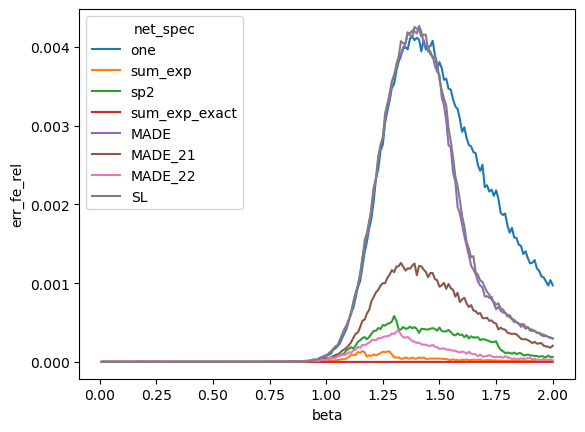

In [57]:
import seaborn as sns
N=100
sns.lineplot(data=data[N], x="beta", y="err_fe_rel", hue="net_spec")

In [28]:
data[10]

,beta,free_energy,free_energy_std,mag_mean,save_dir,file_name,model,net_spec,device,suffix,...,batch_iter,stats_step,num_threads,beta_range,free_energy_mean,entropy_mean,energy_mean,mag,num_params,num_train_params
0,0.01,-69.314944,0.000000,0.248303,results/Curie-Weiss/data/,data,CW,exact,cpu,None,...,20,1,1,"[0.01, 2.0, 200.0]",NaN,NaN,NaN,NaN,NaN,NaN
1,0.02,-34.657814,0.000000,0.249551,results/Curie-Weiss/data/,data,CW,exact,cpu,None,...,20,1,1,"[0.01, 2.0, 200.0]",NaN,NaN,NaN,NaN,NaN,NaN
2,0.03,-23.105592,0.000000,0.250815,results/Curie-Weiss/data/,data,CW,exact,cpu,None,...,20,1,1,"[0.01, 2.0, 200.0]",NaN,NaN,NaN,NaN,NaN,NaN
3,0.04,-17.329599,0.000000,0.252093,results/Curie-Weiss/data/,data,CW,exact,cpu,None,...,20,1,1,"[0.01, 2.0, 200.0]",NaN,NaN,NaN,NaN,NaN,NaN
4,0.05,-13.864099,0.000000,0.253388,results/Curie-Weiss/data/,data,CW,exact,cpu,None,...,20,1,1,"[0.01, 2.0, 200.0]",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.96,NaN,0.004807,0.905210,results/Curie-Weiss/data/,data,CW,SL,cpu,None,...,20,1,1,"[0.01, 2.0, 200.0]",-0.503581,0.248837,-0.376623,0.00589,110.0,110.0
1996,1.97,NaN,0.004841,0.906230,results/Curie-Weiss/data/,data,CW,SL,cpu,None,...,20,1,1,"[0.01, 2.0, 200.0]",-0.502903,0.247070,-0.377487,-0.00239,110.0,110.0
1997,1.98,NaN,0.004791,0.908950,results/Curie-Weiss/data/,data,CW,SL,cpu,None,...,20,1,1,"[0.01, 2.0, 200.0]",-0.502332,0.243766,-0.379218,-0.00315,110.0,110.0
1998,1.99,NaN,0.004764,0.911640,results/Curie-Weiss/data/,data,CW,SL,cpu,None,...,20,1,1,"[0.01, 2.0, 200.0]",-0.501678,0.239506,-0.381323,-0.00228,110.0,110.0


In [20]:
N=20
batch_size=2000
std_fe_limit=1e-4
lr=0.001
data[f"CW_N{N}_bs{batch_size}_fe_lim{std_fe_limit}_lr{lr}"] = pd.read_csv(f"data/CW_N{N}_bs{batch_size}_fe_lim{std_fe_limit}_lr{lr}.zip")

N=50
batch_size=2000
std_fe_limit=1e-4
lr=0.001
data[f"CW_N{N}_bs{batch_size}_fe_lim{std_fe_limit}_lr{lr}"] = pd.read_csv(f"data/CW_N{N}_bs{batch_size}_fe_lim{std_fe_limit}_lr{lr}.zip")

N=50
batch_size=2000
std_fe_limit=1e-4
lr=0.0005
data[f"CW_N{N}_bs{batch_size}_fe_lim{std_fe_limit}_lr{lr}"] = pd.read_csv(f"data/CW_N{N}_bs{batch_size}_fe_lim{std_fe_limit}_lr{lr}.zip")

N=100
batch_size=2000
std_fe_limit=1e-4
lr=0.001
data[f"CW_N{N}_bs{batch_size}_fe_lim{std_fe_limit}_lr{lr}"] = pd.read_csv(f"data/CW_N{N}_bs{batch_size}_fe_lim{std_fe_limit}_lr{lr}.zip")


In [21]:
data.keys()

dict_keys(['CW_N20_bs2000_fe_lim0.0001_lr0.001', 'CW_N50_bs2000_fe_lim0.0001_lr0.001', 'CW_N50_bs2000_fe_lim0.0001_lr0.0005', 'CW_N100_bs2000_fe_lim0.0001_lr0.001'])

<AxesSubplot:xlabel='beta'>

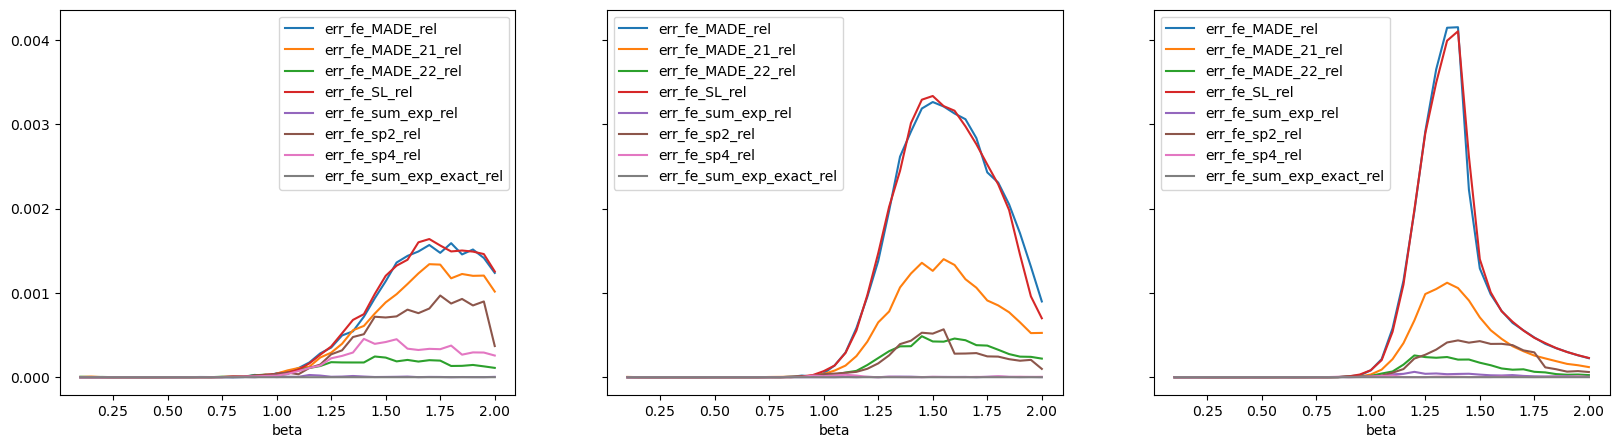

In [22]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,3, figsize=(20,5), sharey=True)
data

name_nets=["_MADE", "_MADE_21", "_MADE_22", "_SL", "_sum_exp", "_sp2", "_sp4", "_sum_exp_exact"]
namess=[f"err_fe{x}_rel" for x in name_nets]
#namess.append("free_energy_std")
data['CW_N20_bs2000_fe_lim0.0001_lr0.001'].plot(x="beta", y=namess, ax=axs[0])
data['CW_N50_bs2000_fe_lim0.0001_lr0.001'].plot(x="beta", y=namess, ax=axs[1])
data['CW_N100_bs2000_fe_lim0.0001_lr0.001'].plot(x="beta", y=namess, ax=axs[2])

<AxesSubplot:xlabel='beta'>

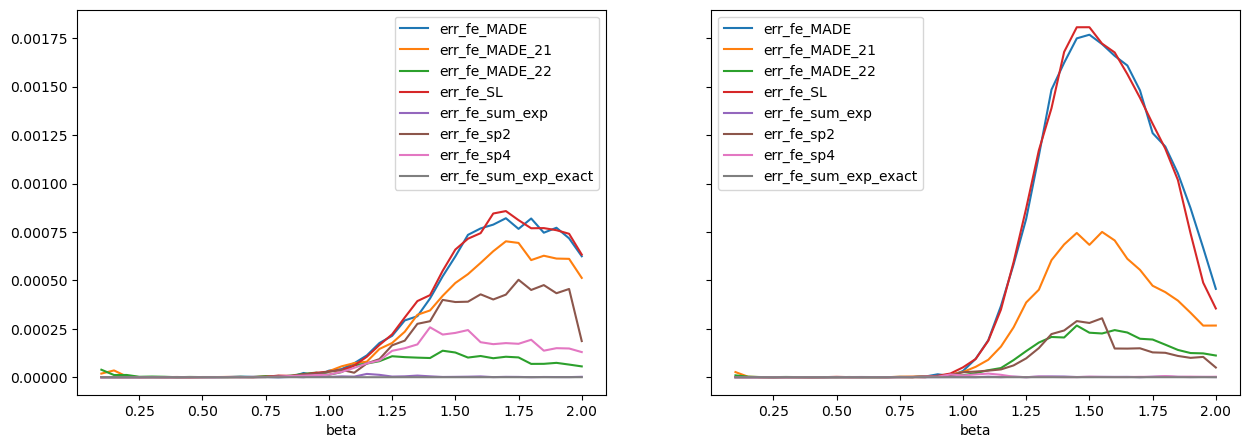

In [23]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,2, figsize=(15,5), sharey=True)
data

name_nets=["_MADE", "_MADE_21", "_MADE_22", "_SL", "_sum_exp", "_sp2", "_sp4", "_sum_exp_exact"]
namess=[f"err_fe{x}" for x in name_nets]
#namess.append("free_energy_std")
data['CW_N20_bs2000_fe_lim0.0001_lr0.001'].plot(x="beta", y=namess, ax=axs[0])
data['CW_N50_bs2000_fe_lim0.0001_lr0.001'].plot(x="beta", y=namess, ax=axs[1])

# Curie Weiss

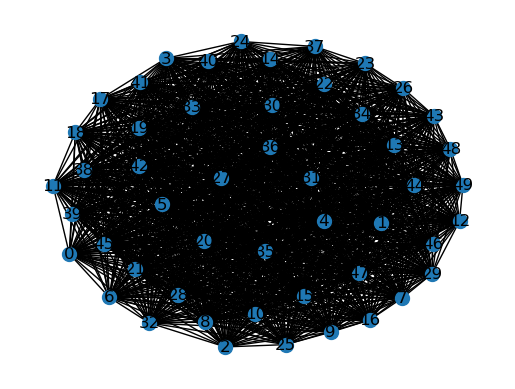

In [3]:
import importlib
import matplotlib.pyplot as plt

N = 50
fig, ax0 = plt.subplots(1,1)
J_interaction = torch.ones(N,N) - torch.eye(N, N)

inter_H = 0
H = inter_H * (torch.ones(N))

if N < 200:
    graph_gen.plot_matrix_graph(J_interaction, ax0)
JJ=1
J_val = JJ/(2*N)
J = J_val * J_interaction

#N_rand, J_interaction_rand = graph_gen.tree_interaction(Degree, Height, rand=True)

# Exact solutions
enumerating all configurations.
Th. results

In [4]:
from python_lib.models import spins_model
import python_lib.models
importlib.reload(spins_model)
from python_lib.models import spins_model

device="cpu"
#device="mps"
CW_model = spins_model.model(N, H, J, J_interaction, device=device)
beta_fin=2

beta_init = 0.1
step = 0.05
betas = np.arange(beta_init, beta_fin+step, step)

In [5]:
from python_lib.models import spins_model
importlib.reload(spins_model)

CW_model_exact = spins_model.KW_exact_fast(N, H, J, J_interaction, device="cpu")
f_exact = []
f_exact_infN = []
for beta_ in betas:
    f_exact.append(CW_model_exact.exact(beta_))
    f_exact_infN.append(CW_model_exact.exact_infN(beta_))

In [6]:
f_exact_infN[0]

{'beta': 0.1,
 'free_energy': -6.931021827284194,
 'free_energy_std': 0,
 'mag_mean': 0.009999666456504392}

In [7]:
CW_model_exact.H[0].item()

0.0

In [8]:
data_exact = pd.DataFrame(f_exact)
f_exact_infN_pd = pd.DataFrame(f_exact_infN)
f_exact_infN_pd = f_exact_infN_pd.add_suffix("_inf")


In [9]:
data = data_exact
data = pd.concat([data, f_exact_infN_pd], axis = 1)


In [10]:
data

,beta,free_energy,free_energy_std,mag_mean,beta_inf,free_energy_inf,free_energy_std_inf,mag_mean_inf
0,0.10,-6.931996,0,0.118328,0.10,-6.931022,0,0.010000
1,0.15,-4.621795,0,0.121727,0.15,-4.620344,0,0.014999
2,0.20,-3.466862,0,0.125422,0.20,-3.464936,0,0.019997
3,0.25,-2.774052,0,0.129456,0.25,-2.771651,0,0.024995
4,0.30,-2.312320,0,0.133882,0.30,-2.309441,0,0.029991
5,0.35,-1.982648,0,0.138765,0.35,-1.979284,0,0.034986
6,0.40,-1.735531,0,0.144186,0.40,-1.731669,0,0.039979
7,0.45,-1.543469,0,0.150243,0.45,-1.539090,0,0.044970
8,0.50,-1.389967,0,0.157061,0.50,-1.385045,0,0.049958
9,0.55,-1.264532,0,0.164800,0.55,-1.259031,0,0.054945


In [11]:
data.dtypes

beta                   float64
free_energy            float64
free_energy_std          int64
mag_mean               float64
beta_inf               float64
free_energy_inf        float64
free_energy_std_inf      int64
mag_mean_inf           float64
dtype: object

<AxesSubplot:xlabel='beta'>

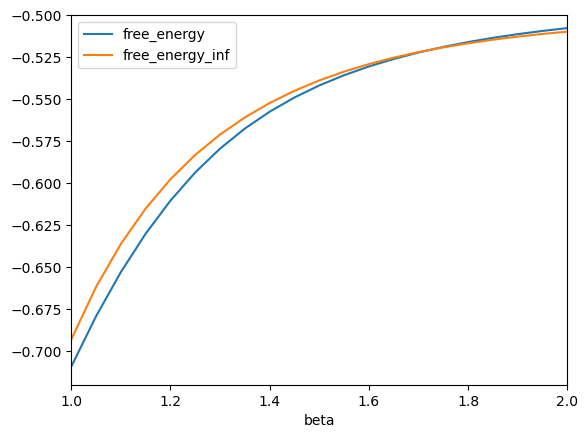

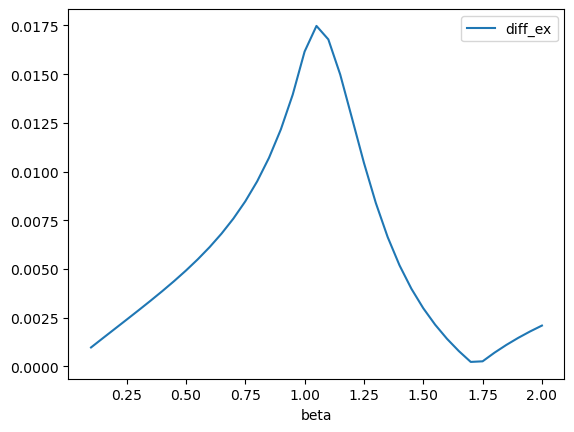

In [12]:
data.plot(x="beta", y= ["free_energy", "free_energy_inf"], ylim=[-0.72,-0.5], xlim=[1,2])
data["diff_ex"] = np.abs(data["free_energy"]- data[ "free_energy_inf"])
data.plot(x="beta", y= "diff_ex")


# Several cases

In [13]:
lr = 0.001
max_step=1000
batch_size=2000
std_fe_limit=1e-4
batch_iter=20

In [14]:
from python_lib.nets import list_nets
importlib.reload(list_nets)
import python_lib.nets.ann
importlib.reload(python_lib.nets.ann)
from python_lib import run_lib
importlib.reload(run_lib);

In [15]:
from python_lib.nets import made
import importlib
importlib.reload(made);

net2train = made.MADE(CW_model, bias=True, device=device)
res = run_lib.train_net(net2train, betas,
    lr = lr,
    max_step=max_step,
    batch_size=batch_size,
    std_fe_limit=std_fe_limit,
    suffix ="_MADE",
    batch_iter=batch_iter
)
data = pd.concat([data, res], axis = 1)


Total Trainable Params: 2550
Total Params: 2550
step: 0 2.00 fe: -0.507 +- 0.00335 E: -0.447, S: 0.121, M: 0.954953

In [16]:
from python_lib.nets import made
import importlib
importlib.reload(made);

net2train = made.MADE(CW_model, 
    bias=True, 
    device=device,
    net_depth=2,
    net_width=1
)
res = run_lib.train_net(net2train, betas,
    lr = lr,
    max_step=max_step,
    batch_size=batch_size,
    std_fe_limit=std_fe_limit,
    suffix ="_MADE_21",
    batch_iter=batch_iter,
)
data = pd.concat([data, res], axis = 1)


Total Trainable Params: 5150
Total Params: 5150
step: 0 2.00 fe: -0.508 +- 0.00172 E: -0.446, S: 0.123, M: 0.954953

In [17]:
from python_lib.nets import made
import importlib
importlib.reload(made);

net2train = made.MADE(CW_model, 
    bias=True, 
    device=device,
    net_depth=2,
    net_width=2
)
res = run_lib.train_net(net2train, betas,
    lr = lr,
    max_step=max_step,
    batch_size=batch_size,
    std_fe_limit=std_fe_limit,
    suffix ="_MADE_22",
    batch_iter=batch_iter,
)
data = pd.concat([data, res], axis = 1)


Total Trainable Params: 10250
Total Params: 10250
step: 0 2.00 fe: -0.508 +- 0.00166 E: -0.444, S: 0.128, M: 0.951952

In [18]:
from python_lib.nets import simple_layer
import importlib
importlib.reload(simple_layer)
net2train = simple_layer.simple_layer(CW_model, bias=True, device=device)
res = run_lib.train_net(net2train, betas,
    lr = lr,
    max_step=max_step,
    batch_size=batch_size,
    std_fe_limit=std_fe_limit,
    suffix ="_SL",
    batch_iter=batch_iter
)
data = pd.concat([data, res], axis = 1)


Total Trainable Params: 2550
Total Params: 2550
step: 0 2.00 fe: -0.507 +- 0.00188 E: -0.448, S: 0.118, M: 0.956954

In [19]:
# from python_lib.nets import ann
# importlib.reload(ann)

# from python_lib.nets import list_nets
# importlib.reload(list_nets)

# one = list_nets.one_var
# input_mask = torch.tril(J_interaction, diagonal=-1)
# input_mask = input_mask.to(dtype=torch.bool)
# dict_nets = {}
# net2train = list_nets.list_nets(CW_model, one, input_mask, device=device, dict_nets=dict_nets)
# res = run_lib.train_net(net2train, betas,
#     lr = lr,
#     max_step=max_step,
#     batch_size=batch_size,
#     std_fe_limit=std_fe_limit,
#     suffix ="_one",
#     batch_iter=batch_iter
# )
# data = pd.concat([data, res], axis = 1)


In [20]:
from python_lib.nets import list_nets
importlib.reload(list_nets)

list_n = list_nets.CW_net
input_mask = torch.tril(J_interaction, diagonal=-1)
input_mask = input_mask.to(dtype=torch.bool)
dict_nets = {}
net2train = list_nets.list_nets(CW_model, list_n, input_mask, device=device, dict_nets=dict_nets)
res = run_lib.train_net(net2train, betas,
    lr = lr,
    max_step=max_step,
    batch_size=batch_size,
    std_fe_limit=std_fe_limit,
    suffix ="_sum_exp_exact",
    exact=True,
    batch_iter=batch_iter
)
data = pd.concat([data, res], axis = 1)


Total Trainable Params: 5294
Total Params: 5294
step: 0 2.00 fe: -0.508 +- 0.00000 E: -0.445, S: 0.125, M: 0.953

In [21]:
from python_lib.nets import list_nets
importlib.reload(list_nets)

list_n = list_nets.CW_net
input_mask = torch.tril(J_interaction, diagonal=-1)
input_mask = input_mask.to(dtype=torch.bool)
dict_nets = {}
net2train = list_nets.list_nets(CW_model, list_n, input_mask, device=device, dict_nets=dict_nets)
res = run_lib.train_net(net2train, betas,
    lr = lr,
    max_step=max_step,
    batch_size=batch_size,
    std_fe_limit=std_fe_limit,
    suffix ="_sum_exp",
    batch_iter=batch_iter
)
data = pd.concat([data, res], axis = 1)


Total Trainable Params: 5294
Total Params: 5294
step: 0 2.00 fe: -0.508 +- 0.00021 E: -0.445, S: 0.126, M: 0.952538

In [22]:
# from python_lib.nets import list_nets
# importlib.reload(list_nets)

# list_n = list_nets.CW_net_sp
# input_mask = torch.tril(J_interaction, diagonal=-1)
# input_mask = input_mask.to(dtype=torch.bool)
# dict_nets = {"num_extremes": 1}
# net2train = list_nets.list_nets(CW_model, list_n, input_mask, device=device, dict_nets=dict_nets)
# res = run_lib.train_net(net2train, betas,
#     lr = lr,
#     max_step=max_step,
#     batch_size=batch_size,
#     std_fe_limit=std_fe_limit,
#     suffix ="_sp",
#     batch_iter=batch_iter
# )
# data = pd.concat([data, res], axis = 1)


In [23]:
from python_lib.nets import list_nets
importlib.reload(list_nets)

list_n = list_nets.CW_net_sp
input_mask = torch.tril(J_interaction, diagonal=-1)
input_mask = input_mask.to(dtype=torch.bool)
dict_nets = {"num_extremes": 2}
net2train = list_nets.list_nets(CW_model, list_n, input_mask, device=device, dict_nets=dict_nets)
res = run_lib.train_net(net2train, betas,
    lr = lr,
    max_step=max_step,
    batch_size=batch_size,
    std_fe_limit=std_fe_limit,
    suffix ="_sp2",
    batch_iter=batch_iter
)
data = pd.concat([data, res], axis = 1)


Total Trainable Params: 982
Total Params: 982
step: 0 2.00 fe: -0.508 +- 0.00111 E: -0.445, S: 0.126, M: 0.953953

In [24]:
from python_lib.nets import list_nets
importlib.reload(list_nets)

list_n = list_nets.CW_net_sp
input_mask = torch.tril(J_interaction, diagonal=-1)
input_mask = input_mask.to(dtype=torch.bool)
dict_nets = {"num_extremes": 4}
net2train = list_nets.list_nets(CW_model, list_n, input_mask, device=device, dict_nets=dict_nets)
res = run_lib.train_net(net2train, betas,
    lr = lr,
    max_step=max_step,
    batch_size=batch_size,
    std_fe_limit=std_fe_limit,
    suffix ="_sp4",
    batch_iter=batch_iter
)
data = pd.concat([data, res], axis = 1)


Total Trainable Params: 1766
Total Params: 1766
step: 0 2.00 fe: -0.508 +- 0.00040 E: -0.445, S: 0.125, M: 0.953532

In [25]:
data["beta"] = betas

In [26]:
name_nets=["_MADE", "_MADE_21", "_MADE_22", "_SL", "_sum_exp", "_sp2", "_sp4", "_sum_exp_exact"]

for kk in name_nets:
    data[f"err_fe{kk}"] = np.abs(data[f"free_energy_mean{kk}"] - data["free_energy"])
    data[f"err_fe{kk}_rel"] = np.abs((data[f"err_fe{kk}"] / data["free_energy"]))


In [27]:
data.to_csv(f"data/CW_N{N}_bs{batch_size}_fe_lim{std_fe_limit}_lr{lr}.zip")

In [ ]:
data.read.csv(f"data/CW_N{N}_bs{batch_size}_fe_lim{std_fe_limit}_lr{lr}.zip")

<AxesSubplot:xlabel='beta'>

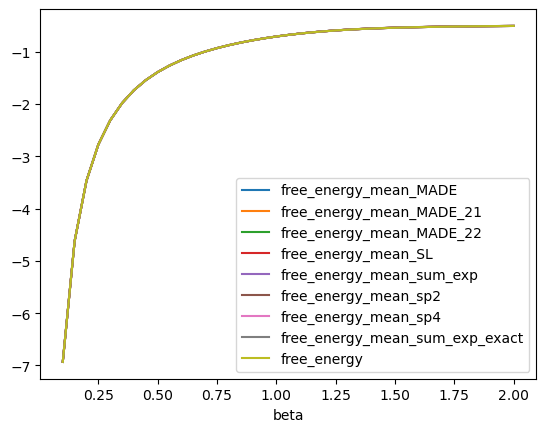

In [28]:
name_nets=["_MADE", "_MADE_21", "_MADE_22", "_SL", "_sum_exp", "_sp2", "_sp4", "_sum_exp_exact"]
kkk="free_energy_mean"
namess=[f"{kkk}{x}" for x in name_nets]
namess.append("free_energy")
data.plot(x="beta", y=namess)


<AxesSubplot:xlabel='beta'>

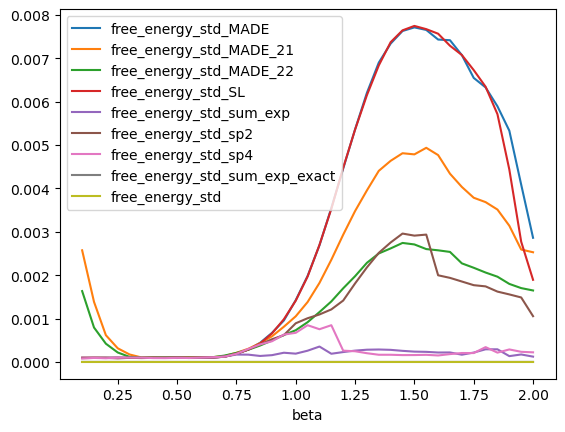

In [29]:
name_nets=["_MADE", "_MADE_21", "_MADE_22", "_SL", "_sum_exp", "_sp2", "_sp4", "_sum_exp_exact"]
kkk="free_energy_std"
namess=[f"{kkk}{x}" for x in name_nets]
namess.append("free_energy_std")
data.plot(x="beta", y=namess)

<AxesSubplot:xlabel='beta'>

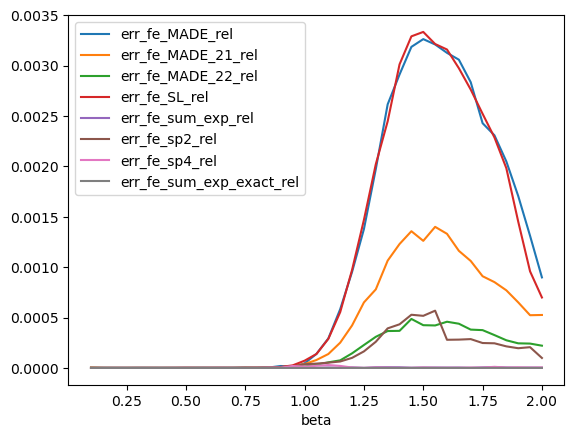

In [30]:
name_nets=["_MADE", "_MADE_21", "_MADE_22", "_SL", "_sum_exp", "_sp2", "_sp4", "_sum_exp_exact"]
namess=[f"err_fe{x}_rel" for x in name_nets]
#namess.append("free_energy_std")
data.plot(x="beta", y=namess)

<AxesSubplot:xlabel='beta'>

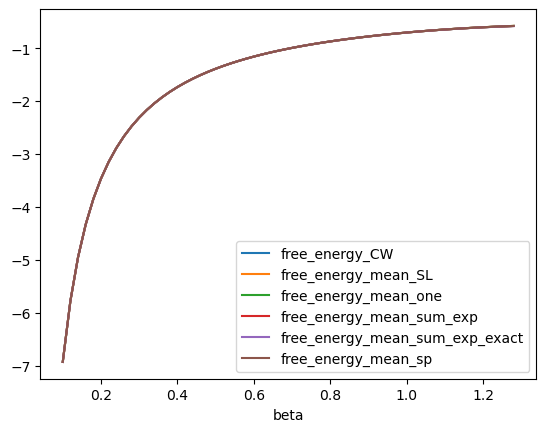

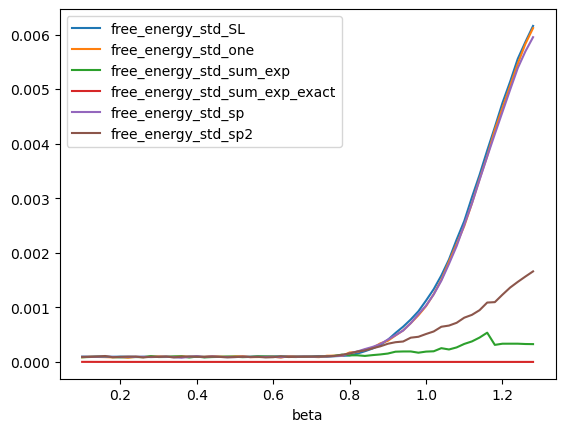

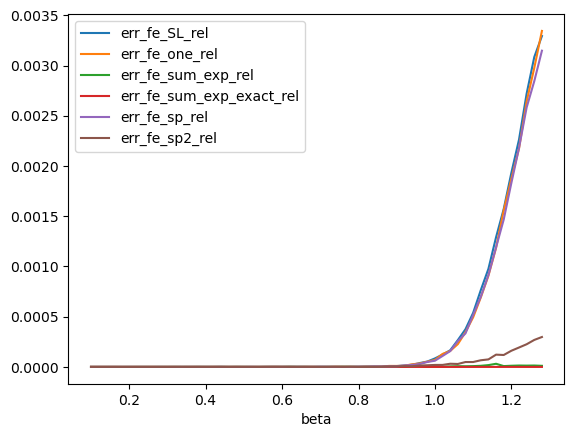

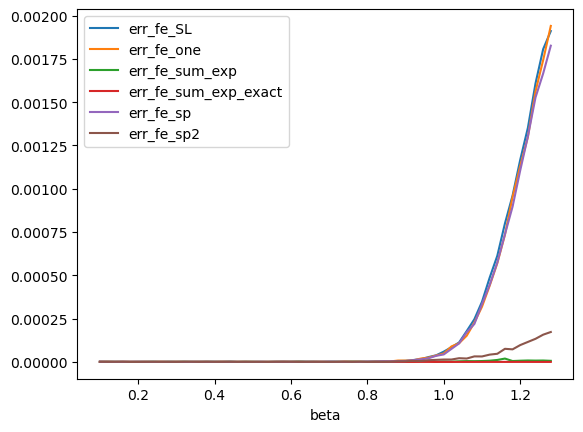

In [27]:

data.plot(x="beta", y=["free_energy_std_SL", "free_energy_std_one", "free_energy_std_sum_exp", "free_energy_std_sum_exp_exact","free_energy_std_sp","free_energy_std_sp2",]) #"free_energy_std_sp4"])
data.plot(x="beta", y=["err_fe_SL_rel", "err_fe_one_rel", "err_fe_sum_exp_rel", "err_fe_sum_exp_exact_rel","err_fe_sp_rel","err_fe_sp2_rel"])#,"err_fe_sp4_rel"])
data.plot(x="beta", y=["err_fe_SL", "err_fe_one", "err_fe_sum_exp", "err_fe_sum_exp_exact", "err_fe_sp", "err_fe_sp2"])# "err_fe_sp4"])

In [ ]:
data.plot(x="beta", y=["mag_mean", "mag_mean_CW", "mag_mean_SL", "mag_mean_one", "mag_mean_sum_exp", "mag_mean_sum_exp_exact"])


KeyError: "['mag_mean'] not in index"

In [129]:
data.plot(x="beta", y=["entropy_mean", "entropy_mean_SL", "entropy_mean_1V", "entropy_mean_SK", "entropy_mean_SK_exact"])


KeyError: "['entropy_mean', 'entropy_mean_1V', 'entropy_mean_SK', 'entropy_mean_SK_exact'] not in index"

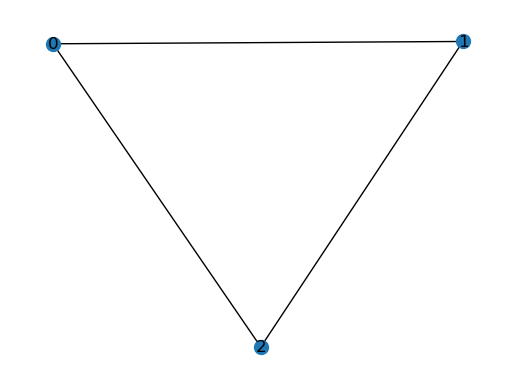

In [30]:
from python_lib.models import spins_model
import python_lib.models
importlib.reload(spins_model)
from python_lib.models import spins_model

N = 3
fig, ax0 = plt.subplots(1,1)
J_interaction = torch.ones(N,N) - torch.eye(N, N)

inter_H = 0
H = inter_H * (torch.ones(N))

if N < 200:
    graph_gen.plot_matrix_graph(J_interaction, ax0)
JJ=1
J_val = JJ/(2*N)
J = J_val * J_interaction


device="cpu"
#device="mps"
CW_model = spins_model.model(N, H, J, J_interaction, device=device)
beta_fin=1.3
beta_init = 0.1
step = 0.1
betas = np.arange(beta_init, beta_fin
, step)

In [31]:
from python_lib.nets import ann
importlib.reload(ann)
from python_lib.nets import list_nets
importlib.reload(list_nets)

one = list_nets.SK_net
input_mask = torch.tril(J_interaction, diagonal=-1)
input_mask = input_mask.long()
dict_nets = {}
net2train = list_nets.list_nets(CW_model, one, input_mask, device=device, dict_nets=dict_nets)

In [33]:
beta = 1
net2train.train(
    beta=beta,
    lr=lr,
    max_step=max_step,
    batch_size=batch_size,
    std_fe_limit = 0.001,
    exact=True
)


step: 0 1.00 fe: -0.594 +- 0.24724 E: 0.069, S: 0.662, M: 0.397

{'beta': 1,
 'free_energy_mean': -0.5935537020365397,
 'free_energy_std': 0.2472420334815979,
 'entropy_mean': 0.6624425649642944,
 'energy_mean': 0.06888888776302338,
 'mag': array([ 0.001, -0.008,  0.034], dtype=float32),
 'mag_mean': 0.3966667056083679}

In [51]:
x, hx=net2train.sample(200000)
torch.abs(x.mean(-1)).mean(), x.mean(-1).mean()

(tensor(0.3982), tensor(0.0010))

In [54]:
i = 0
for nnet in net2train.net:
    print(f"ni: {i}")
    i+=1
    for name, param in nnet.named_parameters():
        print(name, param.data)


ni: 0
weight_p tensor([[ 0.3333,  0.0000, -0.3333]])
bias_p tensor([[1.0000, 0.6931, 0.3333]])
weight_m tensor([[ 0.3333,  0.0000, -0.3333]])
bias_m tensor([[0.3333, 0.6931, 1.0000]])
weight_0p tensor([1.])
weight_0m tensor([-1.])
weight_0 tensor([-0.3333])
bias_0 tensor([-0.])
ni: 1
weight_p tensor([[ 0.1667, -0.1667]])
bias_p tensor([[0.3333, 0.0000]])
weight_m tensor([[ 0.1667, -0.1667]])
bias_m tensor([[0.0000, 0.3333]])
weight_0p tensor([1.])
weight_0m tensor([-1.])
weight_0 tensor([-0.3333])
bias_0 tensor([-0.])
ni: 2
weight_0 tensor([-0.3333])
bias_0 tensor([-0.])


In [198]:
m = x.sum(-1)
m

tensor([ 2., -6.])

In [205]:
weight_p = torch.tensor([[1,2,3,4]], device=device)

In [206]:
weight_p

tensor([[1, 2, 3, 4]])

In [208]:
res = weight_p * torch.unsqueeze(m, dim=1)
res

tensor([[  2.,   4.,   6.,   8.],
        [ -6., -12., -18., -24.]])

In [210]:
torch.logsumexp(res, 1)

tensor([ 8.1451, -5.9975])

In [ ]:
pd.__version__

In [ ]:
data.plot(x="beta", y=["free_energy_std_SL", "free_energy_std_1V"], ylim=(0, 0.1))

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
stats_pd.plot.line(x="beta", y="energy_mean")

In [ ]:
stats_pd.plot.line(x="beta", y="energy_mean")

In [ ]:
all_Js = np.array(all_Js)

In [ ]:
plt.plot(stats_pd["beta"], all_Js[:,2])
plt.plot(stats_pd["beta"], all_Js[:,3])
plt.plot(stats_pd["beta"], all_Js[:,4])
plt.plot(stats_pd["beta"], all_Js[:,5])
plt.plot(stats_pd["beta"], all_Js[:,19])

In [ ]:
import pandas as pd

lr = 0.001
max_step=1000
batch_size=1000
stats = []
net2train = net
for beta in betas:
    net2train.train(
        beta=beta,
        lr=lr,
        max_step=max_step,
        batch_size=batch_size,
        std_fe_limit = 0.001
    )

    stats.append(net.compute_stats(
        beta, batch_size=batch_size, print_=True))
stats_pd = pd.DataFrame(stats)

In [ ]:
from python_lib.nets import simplest
from python_lib.solvers import train_nn_anneal
importlib.reload(simplest)
importlib.reload(solvers)
bias = True
net_simplest = simplest.simplest(CW_model.N, CW_model, bias, device=device)

In [ ]:
from python_lib.nets import one_var
importlib.reload(one_var)
bias = True
net_one_var = one_var.one_var(CW_model.N, CW_model, bias, device=device)

In [ ]:
from python_lib.solvers import train_nn_anneal
importlib.reload(simple_layer)
importlib.reload(solvers)
import pandas as pd

lr = 0.001
max_step=1000
batch_size=1000
stats = []
net2train = net_one_var
for beta in betas:
    net2train.train(
        beta=beta,
        lr=lr,
        max_step=max_step,
        batch_size=batch_size,
        std_fe_limit = 0.001
    )

    stats.append(net.compute_stats(
        beta, batch_size=batch_size, print_=True))
stats_pd = pd.DataFrame(stats)

In [ ]:
stats_pd_est = pd.DataFrame(stats)
import matplotlib.pyplot as plt
fig, (ax0, ax1, ax2) = plt.subplots(3,1)
ax0.plot(betas, stats_pd_est["free_energy_mean"], ".")
ax0.plot(betas, f_exact)
ax0.set_ylim(-1.25,0.)

ax1.plot(betas, np.abs(f_exact-stats_pd_est["free_energy_mean"])/np.abs(f_exact))
ax1.plot(betas, np.abs(f_exact-stats_pd_est["free_energy_mean"]))
    
ax2.plot(stats_pd_est["free_energy_std"])

In [ ]:
net_simplest.layer1.weight

In [ ]:
from python_lib.solvers import train_nn_anneal
importlib.reload(simple_layer)
importlib.reload(solvers)
import pandas as pd

lr = 0.001
max_step=100
batch_size=2000
stats = train_nn_anneal(
    net, 
    np.full(100, 0.0001),
    lr=lr, 
    max_step=5,
    batch_size=batch_size)
stats = train_nn_anneal(
    net, 
    betas,
    lr=lr, 
    max_step=max_step,
    batch_size=batch_size)
stats_pd = pd.DataFrame(stats)

In [ ]:
stats_pd = pd.DataFrame(stats)

In [ ]:
import matplotlib.pyplot as plt
fig, (ax0, ax1, ax2) = plt.subplots(3,1)
ax0.plot(betas, stats_pd["free_energy_mean"], ".")
ax0.plot(betas, f_exact)
ax0.set_ylim(-1.25,-0.6)

ax1.plot(betas, np.abs(f_exact-stats_pd["free_energy_mean"])/np.abs(f_exact))
    
ax2.plot(stats_pd["free_energy_std"])

In [ ]:
import matplotlib.pyplot as plt
fig, (ax0, ax1, ax2) = plt.subplots(3,1)
ax0.plot(betas, stats_pd["free_energy_mean"], ".")
ax0.plot(betas, f_exact)
ax0.set_ylim(-1.25,-0.6)

ax1.plot(betas, np.abs(f_exact-stats_pd["free_energy_mean"]))
    
ax2.plot(stats_pd["free_energy_std"])

In [ ]:
stats_pd.keys()

In [ ]:
stats_pd[stats_pd["beta"]==0.2]

In [ ]:
import matplotlib.pyplot as plt
fig, (ax0, ax1) = plt.subplots(2,1)
ax0.plot(betas, stats_pd["free_energy_mean"], ".")
ax0.plot(np.linspace(0.001,beta,100), f_exact)
ax0.set_ylim(-1.25,-0.7)

for b in np.linspace(0.001,beta,100):
    
err = [np.abs()]

In [ ]:
net.compute_stats(beta, batch_size=50000)

## random case

In [ ]:
from python_lib.nets import bp_nn
importlib.reload(bp_nn)

net_rand = bp_nn.bp_nn(tree_rand.N, tree_rand, True, z2=False, init_zero=False,)
                      
net_rand.train(beta=beta, lr=0.001, 
           max_step=1000,
               opt="adam")


In [ ]:
net_rand.compute_stat_is(beta, batch_size=10000)

# BP solution

In [ ]:
import bp_solver
importlib.reload(bp_solver)

bp_sol = bp_solver.BP_solver(tree_rand)

In [ ]:
beta

In [ ]:
bp_sol.converge(beta)